Ссылка на презентацию: https://docs.google.com/presentation/d/1EAFyV7QQzezutCDIcFtLk43ChznssQjbYqjlSsHYpe4/edit?usp=sharing

# Проект E-commerce — Выявление профилей потребления #

**Описание**

Интернет-магазин товаров для дома и быта «Пока все ещё тут».

**Цель:**

Комплексный анализ покупателя интернет магазина, который позволит увеличить продажи и лояльность клиентов.

**Задача:**

Сегментация покупателей методом RFM (давность покупки, частота покупок, сумма покупок)

Анализ сегментов покупателей:
  - по количеству покупателей
  - по среднему чеку
  - по основным продуктам и категории товаров
  
Анализ категорий товаров и их сезонность по выделенным сегментам покупателей

**Описание данных:** 

Доступ к датасетам из интернета можно получить по адресу https://code.s3.yandex.net/datasets/
Представлен датасет /datasets/ecom_dataset_upd.csv:

- date — дата заказа;
- customer_id — идентификатор покупателя;
- order_id — идентификатор заказа;
- product — наименование товара;
- quantity — количество товара в заказе;
- price — цена товара.

**Этапы анализа**
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных 
4. Составим портрет пользователя по истории покупок
5. Сформулируем гипотезы и проверим статистические гипотезы
6. Выводы
7. Подготовим презентацию.

## Загрузим данные ##

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('/datasets/ecom_dataset_upd.csv')

In [3]:
# создадим копию данных
df_e = df.copy()

In [4]:
# выведем часть таблицы для ознакомления
df_e.head(5)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [5]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


**Вывод**

В данных 7474 строки, 6 столбцов. Необходимо привести тип данных к необходимому типу и провести предобработку данных.

## Предобработка данных ##

### Осмотрим названия столбцов  на нарушение стиля написания ###

In [6]:
df_e.columns

Index(['date', 'customer_id', 'order_id', 'product', 'quantity', 'price'], dtype='object')

Названия написаны с учетом нижнего регистра, без пропусков и пробелов.

In [7]:
# приведем названия товаров к строчной форме
df_e['product'] = df_e['product'].str.lower()
df_e.tail()

,date,customer_id,order_id,product,quantity,price
7469,2020013021,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0
7470,2020013022,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0
7471,2020013102,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0
7472,2020013112,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0
7473,2020013115,2e460a26-35af-453d-a369-a036e95a40e0,103225,вешалка для блузок 41 см красный attribute ahm781,1,104.0


Названия столбцов не требуют исправления, привели названия товаров к строчной форме написания.

### Проверим наличие пропусков ###

In [8]:
# узнаем есть ли пропуски в данных
df_e.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Пропуски в значения отсутствуют

### Пребразуем тип данных в столбе date ###

In [9]:
# так как дата представлена в формате числа (10единиц) то в формате вывода даты последним оставим час 
df_e['date'] = pd.to_datetime(df_e['date'], format='%Y%m%d%H')
df_e.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0


In [10]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         7474 non-null   datetime64[ns]
 1   customer_id  7474 non-null   object        
 2   order_id     7474 non-null   int64         
 3   product      7474 non-null   object        
 4   quantity     7474 non-null   int64         
 5   price        7474 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 350.5+ KB


Изменили тип столбца с int на datetime.

### Проверим наличие явных дубликатов ###

In [11]:
#  проверим налличие явных дубликатов 
df_e.duplicated().sum()

0

Явные дубликаты отсутствуют

### Проверим наличие неявных дубликатов ###

In [12]:
# проверим наличие неявных дубликатов в столбцах date, order_id, product
df_e[df_e.duplicated(['date', 'order_id', 'product'], keep=False)]

,date,customer_id,order_id,product,quantity,price
4297,2019-06-02 10:00:00,f1222eaa-d09d-4bff-ab4e-bea6fe3f68a8,71571,"бегония элатиор, цвет в ассортименте",1,187.0
4298,2019-06-02 10:00:00,95872093-2887-4ce8-8468-19234990e7d7,71571,"бегония элатиор, цвет в ассортименте",1,187.0


In [13]:
# удалим дубль - на один товар два покупателя с одним номером заказа - считаем ошибкой системы
df_e = df_e.drop_duplicates(subset=['date', 'order_id', 'product'], keep='last')
df_e[df_e.duplicated(['date', 'order_id', 'product'],)]

,date,customer_id,order_id,product,quantity,price


In [14]:
# проверим наличие неявных дубликатов в столбцах date, customer_id, order_id, product
df_e[df_e.duplicated(['date', 'customer_id', 'order_id', 'product'])].shape[0]

0

In [15]:
# посмотрим на количество дубликатов в наборе данных
df_e[df_e.duplicated(['customer_id', 'order_id', 'product', 'quantity'])].shape[0]

1866

In [16]:
# посмотрим на данные наборы в таблице
df_e[df_e.duplicated(['customer_id', 'order_id', 'product', 'quantity'])]

,date,customer_id,order_id,product,quantity,price
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
94,2018-10-04 13:00:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,эвкалипт гунни d-17 см h-60 см,1,1409.0
...,...,...,...,...,...,...
6706,2019-10-28 10:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087.0
6711,2019-10-28 21:00:00,cb65d08a-dae7-4890-aef0-bb9f79055e02,73108,мирт d-9 см h-15 см,1,134.0
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"таз пластмассовый со стиральной доской (иж), 1...",1,397.0
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"таз пластмассовый со стиральной доской (иж), 1...",1,397.0


Видим в Данных существует схожесть набора товара который включает в себя идентификатор покупателя и его заказ, товар и его количество. Проанализировав данные можем удалить дубликаты наборов, на основании предположения что оформляя новый заказ в нашем наборе должен меняться идентификатор заказа, а последняя временная дата с заказом приходится на 4 утра. Не зная как работает изнутри система учета и оформления заказа считаем это ошибкой системы. 

In [17]:
# удалим удбликаты и посмотрим на результат
df_e = df_e.drop_duplicates(subset=['customer_id', 'order_id', 'product', 'quantity'], keep='first')
df_e[df_e.duplicated(['customer_id', 'order_id', 'product', 'quantity'])]

,date,customer_id,order_id,product,quantity,price


In [18]:
# проверим набор данных с ценой продукта
df_e[df_e.duplicated(['customer_id', 'order_id', 'product', 'quantity', 'price'])]

,date,customer_id,order_id,product,quantity,price


In [19]:
# сбросим индексы
df_e.reset_index(drop=True)
df_e.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0


In [20]:
# делаем копию
f = df_e.copy()

In [21]:
# группируем данные по заказу, продукту, считаем количество уникальных покупателей
duplicat = f.groupby(['order_id','product'])['customer_id'].nunique()
duplicate = duplicat[duplicat > 1]
if not duplicate.empty:
    print("Найдены заказы, совершенные более чем одним покупателем:")
    print(duplicate)
else:
    print("Заказы совершены только уникальными покупателями.")

Найдены заказы, совершенные более чем одним покупателем:
order_id  product                                                                                           
14872     однолетнее растение петуния махровая в кассете 4 шт, россия                                           2
          однолетнее растение петуния простая в кассете по 4 шт, россия                                         2
          петуния махровая рассада однолетних цветов в кассете по 6 шт                                          2
68785     сиденье в ванну раздвижное, белый, св5, ника                                                          2
69283     сушилка для белья на батарею ника сб6-65 двухъярусная                                                 2
69310     муляж груша желтый 9,5 см полиуретан                                                                  2
69345     сушилка для белья attribute прима 18 м синяя adp618                                                   2
69410     муляж желудь 2 шт         

In [22]:
# создаем список значений дубликатов заказов 
order_ids = duplicate.index.get_level_values('order_id').unique().tolist()
print(order_ids)

[14872, 68785, 69283, 69310, 69345, 69410, 69485, 69531, 69833, 70114, 70542, 70631, 70726, 70808, 70903, 70946, 71054, 71226, 71461, 71480, 71542, 71648, 71663, 72188, 72778, 72790, 72845, 72950]


In [23]:
# удалим заказы которые имеют несколиких покупателей на один заказ (т.к. их немного)
# Создаем булеву маску
mask = ~f['order_id'].isin(order_ids)

# Фильтруем DataFrame
df_filtered = f[mask]

df_filtered

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0


In [24]:
duplicat = df_filtered.groupby(['order_id','product'])['customer_id'].nunique()
duplicate = duplicat[duplicat > 1]
if not duplicate.empty:
    print("Найдены заказы, совершенные более чем одним покупателем:")
    print(duplicate)
else:
    print("Заказы совершены только уникальными покупателями.")

Заказы совершены только уникальными покупателями.


In [25]:
# посмотрим информацию об измененном датафрейме
df_e = df_filtered.copy()
df_e.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0


In [26]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5543 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5543 non-null   datetime64[ns]
 1   customer_id  5543 non-null   object        
 2   order_id     5543 non-null   int64         
 3   product      5543 non-null   object        
 4   quantity     5543 non-null   int64         
 5   price        5543 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 303.1+ KB


***Вывод:***

1. Названия столбцов соответствуют правилам написания.
2. Пропуски в значения отсутствуют.
3. Преобразовали тип данных в столбце date.
4. Явных дубликатов не обнаружено.
5. Неявных дубликатов удалили 1932 строки.
6. Сократили размер данных на 13,4%.

## Исследовательский анализ данных ##

### Группируем товар по категориям ###

In [27]:
# посмотрим сколько уникальных названий товаров в данных
len(df_e['product'].unique())

2333

In [28]:
# соберем уникальные значения в новом DF
unique = pd.DataFrame(df_e['product'].unique(),columns = ['product'])
unique.head()

,product
0,"комнатное растение в горшке алое вера, d12, h30"
1,"комнатное растение в горшке кофе арабика, d12,..."
2,радермахера d-12 см h-20 см
3,хризолидокарпус лутесценс d-9 см
4,циперус зумула d-12 см h-25 см


In [29]:
# создадим столбцы с первым словом в названии продукта
unique['name'] = unique['product'].apply(lambda x:x.split()[:1]).str.join(', ')

In [30]:
# посмотрим сколько уникальных слов в новом столбце name
len(unique['name'].value_counts())

461

In [31]:
# превратим столбец с список и выведем его для ознакомления 
u = unique['name'].unique()
#u

In [32]:
product_categories = {'кухонная_посуда':['мини-сковорода','сковорода','стеклянная', 'тарелка','сотейник','половник',
'вилка','ложка','нож','набор','толкушка','противень','масленка','салатник','чайный','рыбочистка','терка',
'кружка','лопатка','салфетница','стакан','столовая','чайная','овощечистка','измельчитель','картофелемялка','блюдце'],
'декор':['муляж','цветок','искусственный','декоративная'],
'бытовые_приборы':['чайник','миксер','утюг','овощеварка','фен','мантоварка','мантоварка-пароварка','электроштопор',
'пылесос','соковарка','соковыжималка','вакуумный'], 
'бытовая_химия':['стиральный','чистящий','жидкое','пена','зубная','мыло','средство','антижир','ароматизированное',
'бальзам','ополаскиватель','мыло-скраб','кондиционер','концентрат','антинакипин','отбеливатель'],
'хозтовары':['настенная','таз','чехол','вешалка','сушилка','крючок','корзина','доска',
'сумка-тележка','щетка-сметка','сумка','ерш','коврик','подкладка','дозатор','ёрш','мусорный',
'плед','скатерть','кувшин','котел','ковер','перчатки','стремянка','гладильная','лестница-стремянка',
'тележка','готовая','простыня','штора','банка','стяжка','комплект','плечики','подушка','полотенце',
'крепеж','пружина','петля','салфетка','вкладыши','кофр','tepмокружка','щетка','стремянки','щетка-утюжок',
'светильник','ковёр','подрукавник','сверло-фреза','контейнер','швабра','ящик','подголовник',
'ведро','короб','коробка','наматрасник','наматрицник-чехол','насадка','веник', 'карниз','ножеточка',
'вешалка-плечики','настольная','сиденье','корыто','холодная','сервировочная','шнур','урна',
'сметка','халат','измерительный','линейка','бензин','паста','петля-стрела','вешалки'
'лоток','вешалка-стойка','держатель','пробка','губка','универсальное','ролик','сменный',
'термометр','шило','ковш','кухонные','кисточка','скребок','комод','жестяная','рассекатель','сетка','весы',
'покрывало','подставка','вешалка-сушилка','миска','одеяло','ручка-скоба','пресс','термостакан','новогоднее',
'мыльница','защитный','многофункциональный','стремянка-табурет','кольца','вантуз','термокружка','фоторамка',
'этажерка','термос','фарфоровая','простынь','столовый','полки','бульонница','ключница','разделочная','складная',
'емкость','защитная','гипоаллергенный','вешалка-перекладина','модульная','лестница','просеиватель','кастрюля',
'махровое','искусственная','совок','хлебница','насадка-отжим','нетканые','фал','форма','орехоколка','штанга',
'увлажняющая','кухонное','подарочный','махровый','штангенциркуль','скалка','рукав','венчик','сито','бак',
'тортница','блюдо','полка','окномойка','урна-пепельница','сменная','ткань','насадка-моп','подвесное',
'наматрацник','автоматическая','тряпкодержатель','девичий','бельевые','сверло','фиксатор-шар',
'наволочка','обувница-3','пододеяльник','отжим','пряные','шпагат','стеллаж','бидон','складной','ванна',
'корзинка','ваза','прищепки','отделитель','шприц','крышка','покрытие','веревка','мешок','сахарница','завертка',
'ручка','пьезозажигалка','решетка','запасная','щётка','универсальный','уголок','тряпка','двуспальное','стяжки',
'кипятильник','основание','мерный','шпингалет'],
'растения':['комнатное','радермахера','циперус','шеффлера','юкка','хризолидокарпус','многолетнее',
'рассада','герань','пеларгония','суккулент','эхеверия','эвкалипт','адиантум','кампанула','калатея',
'нолина','хлорофитум','цикламен','глоксиния','азалия','гортензия','хризантема','цветущее','мирт',
'кориандр','афеляндра','аспарагус','иссоп','сантолина','соланум','антуриум','молодило','фиалка','гербера',
'душица','мелисса','роза','бегония','розмарин','альбука','бальзамин','крассула','лаванда','мята','артемизия', 
'морковь','настурция','огурец','петуния','алиссум','гвоздика','годеция','календула','капуста','кореопсис',
'космея','лапчатка','львиный','флокс','цинерария','эшшольция','диффенбахия','фаленопсис','каланхое','примула',
'дендробиум','калоцефалус','каллуна','капсикум','мимоза','бархатцы','подсолнечник','пуансетия','гиностемма','ель',
'кипарисовик','аптения','пуансеттия','скиммия','фиттония','тимьян','алоэ','спатифиллум','фикус','кодонанта',
'цикламен','гимнокалициум','эхинокактус','крокусы','гипсофила','калибрахоа','эпипремнум','аквилегия','базилик',
'горох','земляника','незабудка','седум','томат','укроп','нефролепис','калла','декабрист','тюльпан','гиацинт',
'вербена','однолетнее','чабер','бакопа','ранункулус','газания','овсянница','георгина','смолевка','цинния',
'лавр','вербейник','виола','колокольчик','котовник','эхинацея','ясколка','лилейник','папоротник','платикодон',
'энотера','фуксия','цитрофортунелла','пеперомия','дыня','циния','синнингия','гардения','томата','лобелия','табак',
'мускари','пиретрум','агератум','колеус','тагетис','цинерания','муррайя','портулак','астра','аргирантерум','левкой',
'вероника','целозия','арбуз','баклажан','клубника','патиссон','маттиола','сальвия','лук','джункус','драцена',
'фатсия','хоста','гайлардия','монарда','нивянник','рудбекия','барвинок','осина','сциндапсус','бузульник',
'камнеломка','солидаго','физостегия','бадан','лен','лантана','лаватера','анемона','буддлея','валериана',
'змееголовник','любисток','петрушка','сельдерей','шалфей','вигна','кабачок','тыква','хамедорея','зверобой',
'мединилла','импатиенс','клен','замиокулькас','амариллис','пахира','салат','литопс','кофе']}       

In [33]:
# выведем функцию для преобразования значения списка из созданного словаря product_categories
# в значение ключа списка
def categories (purpose):
    for category, items_list in product_categories.items():
        for item in items_list:
            if item in purpose:
                return category
    return 'общая' 

In [34]:
# создадим столбец со значением категории товаров  
df_e['categories'] = df_e['product'].apply(categories)
df_e.sample(10)  

,date,customer_id,order_id,product,quantity,price,categories
2583,2019-04-01 11:00:00,f3639fa4-5db8-402e-91d7-53f7f6b3a519,70951,коврик придверный хлопковый 55х110 см мультико...,1,209.0,хозтовары
3821,2019-05-15 08:00:00,3976660e-6cca-4009-a170-be13f13ed459,14778,томата (помидор) большая желтая зебра №10 сорт...,1,38.0,растения
2037,2019-02-26 12:00:00,b2167c74-31df-4c96-8325-ab86dcd23c20,70471,термокружка яромир кремль яр-2406м 400 мл,1,464.0,кухонная_посуда
46,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"вилка столовая ripple сталь 3 мм, 3 шт, attrib...",1,187.0,кухонная_посуда
2140,2019-03-03 16:00:00,38b161da-8b0d-4053-9fb2-9b87fc961dd6,14557,"рассада огурца сорт изящный, кассета по 6шт",1,116.0,растения
4587,2019-06-05 09:00:00,7d5d5657-5fdc-40d1-b7b6-bb04ede92b53,14848,роза садовая парковая в горшке голден селебрейшен,1,188.0,растения
3293,2019-04-29 13:00:00,603e92a4-fc7f-4203-9ca5-103da5b008ac,14705,петуния surfinia blue sky небесно-голубой объе...,1,90.0,растения
3238,2019-04-27 16:00:00,d3b9ffea-d143-4747-8d59-74ab843d1ad6,14698,томата (помидор) фейерверк № 114 сорт индетерм...,1,38.0,растения
5856,2019-07-14 14:00:00,bccbac25-08c2-44b8-9efe-c64cd9f65771,71972,"корыто оцинкованное 45 л бесшовное, 1303007",1,749.0,хозтовары
7459,2020-01-28 18:00:00,75c1d45a-be89-4f94-8c38-0d386f718943,102547,вешалка-сушилка gimi paco,1,1087.0,хозтовары


In [35]:
# сбросим индексы
df_e = df_e.reset_index(drop=True)
df_e.tail()

,date,customer_id,order_id,product,quantity,price,categories
5538,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0,растения
5539,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0,растения
5540,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0,хозтовары
5541,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0,растения
5542,2020-01-31 15:00:00,2e460a26-35af-453d-a369-a036e95a40e0,103225,вешалка для блузок 41 см красный attribute ahm781,1,104.0,хозтовары


### Даты начала и конца периода исследования данных ###

In [36]:
# посмотрим какие мин и макс даты
start_data = df_e['date'].min()
end_data = df_e['date'].max()
'Начало периода', start_data, '  Окончание периода', end_data

('Начало периода',
 Timestamp('2018-10-01 00:00:00'),
 '  Окончание периода',
 Timestamp('2020-01-31 15:00:00'))

### Добавим столбец с месяцем на основе столбца date ###

In [37]:
# создадим столбец с месяцем покупки
df_e['month'] = pd.DatetimeIndex(df_e['date']).month
df_e.sample(3)

,date,customer_id,order_id,product,quantity,price,categories,month
361,2018-10-23 21:00:00,aad8e182-8789-4c16-a85e-5750edd1099f,68733,сушилка для белья настенная zalger prima 510-7...,1,299.0,хозтовары,10
2539,2019-04-22 10:00:00,f31458f9-8b2e-421b-a0f2-5480f80ab7ce,14669,пеларгония зональная диам. 12 см розовая махровая,1,150.0,растения,4
745,2018-11-19 13:00:00,a22a06d8-ba39-4ee0-be74-84f471cd18a6,69050,чехол для одежды большой 137х60х10 см светло-б...,1,449.0,хозтовары,11


In [38]:
# Создадим столбец с годом
df_e['year'] = pd.DatetimeIndex(df_e['date']).year
df_e.sample(3)

,date,customer_id,order_id,product,quantity,price,categories,month,year
57,2018-10-02 18:00:00,649c4398-a4c4-4d01-b29b-f14704ce6e17,68508,"котел алюминиевый 70,0 л без крышки балезино, ...",1,2924.0,хозтовары,10,2018
4443,2019-09-11 21:00:00,3572785c-bbf3-4f50-8295-abf6df92617f,72593,фаленопсис желтый в розовую полоску d-12 см,1,599.0,хозтовары,9,2019
931,2018-12-02 23:00:00,f033f8bb-1714-4bb8-8369-4a5b4ebc7216,69178,коврик кухонный apache olive oil sideboard 56х...,1,1447.0,хозтовары,12,2018


### Добавим столбец с общей выручкой и визуализацией её динамики ###

In [39]:
# добавим столбец с общей выручкой
df_e['total_revenue'] = df_e['quantity'] * df_e['price']
df_e.head()

,date,customer_id,order_id,product,quantity,price,categories,month,year,total_revenue
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,растения,10,2018,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,растения,10,2018,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,растения,10,2018,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,растения,10,2018,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,растения,10,2018,112.0


In [40]:
df_e = df_e.reset_index(drop=True)
df_e.head()

,date,customer_id,order_id,product,quantity,price,categories,month,year,total_revenue
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,растения,10,2018,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,растения,10,2018,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,растения,10,2018,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,растения,10,2018,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,растения,10,2018,112.0


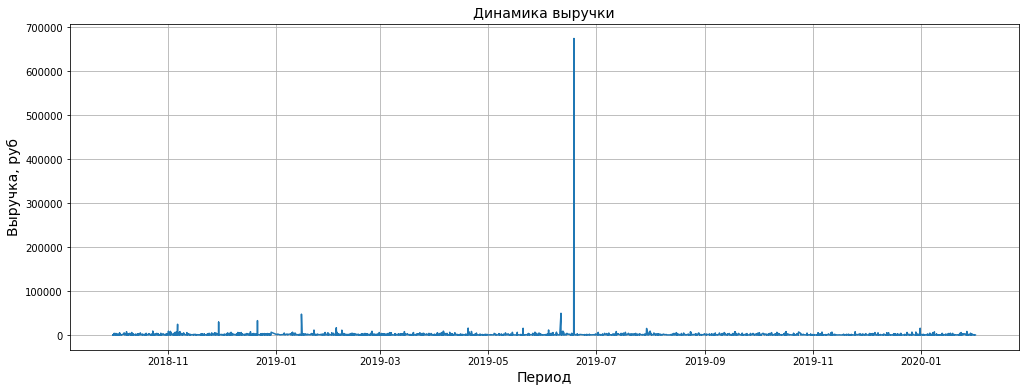

In [41]:
# посмотрим на графический вывод общей выручки
plt.figure(figsize=(17, 6))
plt.plot(df_e['date'], df_e['total_revenue'])
plt.xlabel("Период", fontsize=14)
plt.ylabel("Выручка, руб",fontsize=14)
plt.title("Динамика выручки", fontsize=14)
plt.grid(True)
plt.show()

In [42]:
# имеем выброс значения, посмотрим общую картину данных
df_e.describe()

,order_id,quantity,price,month,year,total_revenue
count,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000
mean,55862.505863,2.582176,530.443457,6.668952,2018.828973,830.086310
std,32502.323728,16.478896,973.838580,3.602385,0.488752,9206.988212
min,12624.000000,1.000000,9.000000,1.000000,2018.000000,9.000000
25%,14810.000000,1.000000,90.000000,4.000000,2019.000000,120.000000
50%,69184.000000,1.000000,150.000000,6.000000,2019.000000,194.000000
75%,71935.000000,1.000000,524.000000,10.000000,2019.000000,734.000000
max,112789.000000,1000.000000,14917.000000,12.000000,2020.000000,675000.000000


In [43]:
# найдем максимальное значение выручки и посмотрим на заказ
max_value = df_e['total_revenue'].max()
max_rows = df_e[df_e['total_revenue'] == max_value]
max_rows

,date,customer_id,order_id,product,quantity,price,categories,month,year,total_revenue
3793,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675.0,хозтовары,6,2019,675000.0


Видим что клиент заказал большое количество товара на сумму которая может сказаться на результатах сегментирования клиентов, удалим сам заказ.

In [44]:
# Находим индекс максимального значения  и удалим данный заказ
max_index = df_e['total_revenue'].idxmax()
df_e = df_e.drop(max_index)

In [45]:
# проверим еще раз данные 
df_e.describe()

,order_id,quantity,price,month,year,total_revenue
count,5542.000000,5542.000000,5542.000000,5542.000000,5542.000000,5542.000000
mean,55859.640383,2.402201,530.417373,6.669073,2018.828943,708.438906
std,32504.556261,9.593154,973.924515,3.602699,0.488791,1656.293724
min,12624.000000,1.000000,9.000000,1.000000,2018.000000,9.000000
25%,14810.000000,1.000000,90.000000,4.000000,2019.000000,120.000000
50%,69182.500000,1.000000,150.000000,6.000000,2019.000000,194.000000
75%,71935.500000,1.000000,524.000000,10.000000,2019.000000,734.000000
max,112789.000000,334.000000,14917.000000,12.000000,2020.000000,49432.000000


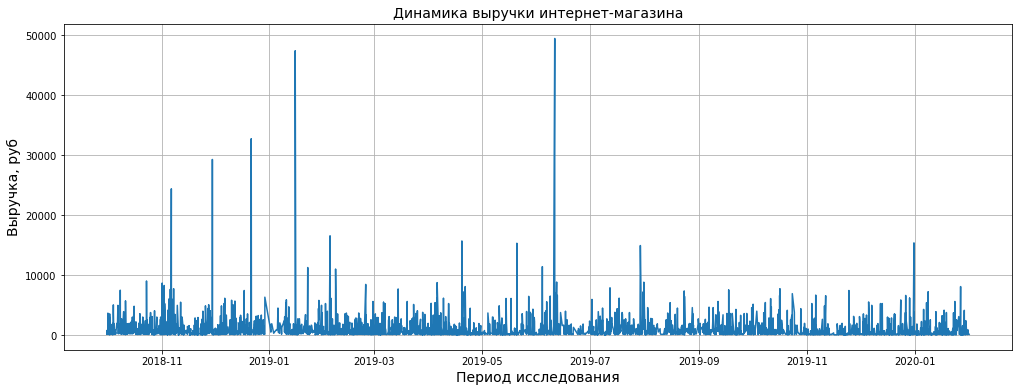

In [46]:
plt.figure(figsize=(17, 6))
plt.plot(df_e['date'], df_e['total_revenue'])
plt.xlabel('Период исследования', fontsize=14)
plt.ylabel('Выручка, руб', fontsize=14)
plt.title('Динамика выручки интернет-магазина', fontsize=14)
plt.grid(True)
plt.show()

#### Проверим выбросы по чеку и количеству заказов на 1 покупателя ####

In [47]:
df_e.shape

(5542, 10)

In [48]:
# группируем по order_id и суммируем price для каждого заказа
order_totals = df_e.groupby('order_id')['total_revenue'].sum().reset_index()

In [49]:
order_totals['total_revenue'].describe()

count     3492.000000
mean      1124.332307
std       2088.419711
min          9.000000
25%        194.000000
50%        584.000000
75%       1267.250000
max      49432.000000
Name: total_revenue, dtype: float64

In [50]:
(np.percentile(order_totals['total_revenue'], [95,99]))

array([3777.35, 7505.09])

In [51]:
# в переменную посчитаем 99 квантиль
percentile_99 = order_totals['total_revenue'].quantile(0.99)

In [52]:
# оставляем данные превышающие 99 перцертиль
high_revenue_orders = order_totals[order_totals['total_revenue'] > percentile_99]
(f"чек првышающий 99 перцентиль: {percentile_99:.2f}")

'чек првышающий 99 перцентиль: 7505.09'

In [53]:
# количество чеков превышающих 99 перцентиль
num_high_revenue_orders = len(high_revenue_orders)
(f"количество чеков: {num_high_revenue_orders}")

'количество чеков: 35'

In [54]:
# объединяем таблицу с основным DF чтобы посмотреть строки заказов 
high_revenue_order_details = pd.merge(high_revenue_orders, df_e, on='order_id', how='left')
display(high_revenue_order_details.head(10))

,order_id,total_revenue_x,date,customer_id,product,quantity,price,categories,month,year,total_revenue_y
0,14735,10656.0,2019-05-08 13:00:00,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,подвесное кашпо дихондра серебристая объем 4 л,5,488.0,хозтовары,5,2019,2440.0
1,14735,10656.0,2019-05-08 13:00:00,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,подвесное кашпо калибрахоа aloha kona dark red...,1,488.0,хозтовары,5,2019,488.0
2,14735,10656.0,2019-05-08 13:00:00,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,подвесное кашпо калибрахоя snowberry белая объ...,3,488.0,хозтовары,5,2019,1464.0
3,14735,10656.0,2019-05-08 13:00:00,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,подвесное кашпо пеларгония махровая calliope d...,4,600.0,хозтовары,5,2019,2400.0
4,14735,10656.0,2019-05-08 13:00:00,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,подвесное кашпо пеларгония махровая calliope r...,4,600.0,хозтовары,5,2019,2400.0
5,14735,10656.0,2019-05-08 13:00:00,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,подвесное кашпо петуния surprise white белая о...,3,488.0,хозтовары,5,2019,1464.0
6,68529,8758.0,2018-10-04 17:00:00,d1a13243-9111-454f-848c-dcce0958528c,сумка-тележка хозяйственная andersen scala sho...,1,5024.0,хозтовары,10,2018,5024.0
7,68529,8758.0,2018-10-04 17:00:00,d1a13243-9111-454f-848c-dcce0958528c,сумка-тележка хозяйственная rolser jet cuadro ...,1,3734.0,хозтовары,10,2018,3734.0
8,68611,8550.0,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,"крепеж для пружины дверной, 1107055",150,19.0,хозтовары,10,2018,2850.0
9,68611,8550.0,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0,хозтовары,10,2018,5700.0


In [55]:
# используем для анализа данных покупателя - потом из проекта удалим эти 2 расчета
df_e.query('customer_id=="d35ce92b-08ec-46a5-87c5-2ef42c65ed3e"')

,date,customer_id,order_id,product,quantity,price,categories,month,year,total_revenue
2937,2019-05-08 13:00:00,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,14735,подвесное кашпо дихондра серебристая объем 4 л,5,488.0,хозтовары,5,2019,2440.0
2938,2019-05-08 13:00:00,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,14735,подвесное кашпо калибрахоа aloha kona dark red...,1,488.0,хозтовары,5,2019,488.0
2939,2019-05-08 13:00:00,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,14735,подвесное кашпо калибрахоя snowberry белая объ...,3,488.0,хозтовары,5,2019,1464.0
2940,2019-05-08 13:00:00,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,14735,подвесное кашпо пеларгония махровая calliope d...,4,600.0,хозтовары,5,2019,2400.0
2941,2019-05-08 13:00:00,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,14735,подвесное кашпо пеларгония махровая calliope r...,4,600.0,хозтовары,5,2019,2400.0
2942,2019-05-08 13:00:00,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,14735,подвесное кашпо петуния surprise white белая о...,3,488.0,хозтовары,5,2019,1464.0


In [56]:
df_e.query('customer_id=="cd09ea73-d9ce-48c3-b4c5-018113735e80"')

,date,customer_id,order_id,product,quantity,price,categories,month,year,total_revenue
197,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0,хозтовары,10,2018,2850.0
198,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0,хозтовары,10,2018,5700.0


Видим средний размер чека 1124.33р, 5% чеков свыше 3777.35р, 1% чеков превышает 7505р, удалять данные покупателей чей чек превышает сумму 99 перцентиль не будем, так как в заказы содержат в себе разные наборы товаров.

In [57]:
# подсчитываем количество заказов на покупателя
customer_orders = df_e.groupby('customer_id')['order_id'].nunique().reset_index()
customer_orders

,customer_id,order_id
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1
1,001cee7f-0b29-4716-b202-0042213ab038,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,1
3,002d4d3a-4a59-406b-86ec-c3314357e498,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1
...,...,...
2407,ff601403-b094-4b86-9ac6-264d725b9277,2
2408,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1
2409,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,1
2410,ffb80538-3fda-4351-8ea9-9d2bec58bb07,1


In [58]:
customer_orders['order_id'].describe()

count    2412.000000
mean        1.447761
std         2.698635
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       126.000000
Name: order_id, dtype: float64

In [59]:
(np.percentile(customer_orders['order_id'], [95,99]))

array([2., 3.])

In [60]:
# пепеменной присвоим значение  99 перцентиль
percentil_99 = customer_orders['order_id'].quantile(0.99)

In [61]:
# оставляем данные превышающие 99 перцентиль
high_revenue_customer = customer_orders[customer_orders['order_id'] > percentil_99]
f"заказы больше 99 перцентиля: {percentil_99:.2f}"

'заказы больше 99 перцентиля: 3.00'

In [62]:
# количество заказов превышающих 99 перцентиль
num_high_revenue_customer = len(high_revenue_customer)
(f"количество заказов: {num_high_revenue_customer}")

'количество заказов: 8'

In [63]:
# объединяем таблицу с основным DF чтобы посмотреть строки заказов 
high_revenue_customer_details = pd.merge(high_revenue_customer, df_e, on='customer_id', how='left')
display(high_revenue_order_details.head(20))

,order_id,total_revenue_x,date,customer_id,product,quantity,price,categories,month,year,total_revenue_y
0,14735,10656.0,2019-05-08 13:00:00,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,подвесное кашпо дихондра серебристая объем 4 л,5,488.0,хозтовары,5,2019,2440.0
1,14735,10656.0,2019-05-08 13:00:00,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,подвесное кашпо калибрахоа aloha kona dark red...,1,488.0,хозтовары,5,2019,488.0
2,14735,10656.0,2019-05-08 13:00:00,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,подвесное кашпо калибрахоя snowberry белая объ...,3,488.0,хозтовары,5,2019,1464.0
3,14735,10656.0,2019-05-08 13:00:00,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,подвесное кашпо пеларгония махровая calliope d...,4,600.0,хозтовары,5,2019,2400.0
4,14735,10656.0,2019-05-08 13:00:00,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,подвесное кашпо пеларгония махровая calliope r...,4,600.0,хозтовары,5,2019,2400.0
5,14735,10656.0,2019-05-08 13:00:00,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,подвесное кашпо петуния surprise white белая о...,3,488.0,хозтовары,5,2019,1464.0
6,68529,8758.0,2018-10-04 17:00:00,d1a13243-9111-454f-848c-dcce0958528c,сумка-тележка хозяйственная andersen scala sho...,1,5024.0,хозтовары,10,2018,5024.0
7,68529,8758.0,2018-10-04 17:00:00,d1a13243-9111-454f-848c-dcce0958528c,сумка-тележка хозяйственная rolser jet cuadro ...,1,3734.0,хозтовары,10,2018,3734.0
8,68611,8550.0,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,"крепеж для пружины дверной, 1107055",150,19.0,хозтовары,10,2018,2850.0
9,68611,8550.0,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0,хозтовары,10,2018,5700.0


In [64]:
high_revenue_customer

,customer_id,order_id
17,0184f535-b60a-4914-a982-231e3f615206,5
687,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4
729,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35
1079,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17
1718,b7b865ab-0735-407f-8d0c-31f74d2806cc,7
1789,bea7a833-2074-42db-bc49-4457abd3c930,4
1884,c971fb21-d54c-4134-938f-16b62ee86d3b,126
2109,e0535076-6270-4df2-8621-cb06264a94fa,4


In [65]:
df_e.query('customer_id=="c971fb21-d54c-4134-938f-16b62ee86d3b"')

,date,customer_id,order_id,product,quantity,price,categories,month,year,total_revenue
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beig...,1,674.0,хозтовары,10,2018,674.0
20,2018-10-02 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,чехол для гладильной доски festival 137x60 см ...,1,1162.0,хозтовары,10,2018,1162.0
60,2018-10-03 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68511,набор прищепок большие пластиковые rozenbal пи...,10,86.0,кухонная_посуда,10,2018,860.0
61,2018-10-03 10:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68514,сушилка для белья attribute прима 11 м синяя н...,1,749.0,хозтовары,10,2018,749.0
124,2018-10-08 07:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68561,тележка багажная delta тбр-20 коричневый с ора...,1,742.0,хозтовары,10,2018,742.0
...,...,...,...,...,...,...,...,...,...,...
1848,2019-03-04 15:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70582,нефролепис бостон d-12 см,1,292.0,растения,3,2019,292.0
1850,2019-03-04 16:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70589,калла крупноцветковая желтая,1,374.0,растения,3,2019,374.0
1866,2019-03-05 13:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70606,пеларгония розебудная red pandora укорененный ...,1,134.0,растения,3,2019,134.0
1870,2019-03-05 15:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70614,гладильная доска ника lora fashion hlf 123х46 см,1,1949.0,хозтовары,3,2019,1949.0


Видим количество заказов на 1 покупателя у 50% - 1 заказ,  у 1% покупателей количество заказов больше 3 - таких покупателей 8, удалять покупателей с количеством заказов больше 3 не будем, так как заказы состоят из разных товаров. 

In [66]:
df_e.shape

(5542, 10)

***Вывод***

 Анализ чеков и количества заказов показал отсутствие необходимости удалять данные покупателя из основного DF.

***Вывод***
1. График показывает что выручка интернет магазина в течении всего периода находится в диапазоне от 3000 до 7000р. 
2. Выручка в нескольких периодах (меньше месяца) имеет всплески от 25000 до 50000р в октябре, ноябре, декабре, январе, и июне.

### Рассчитаем средний чек заказа, построим график его динамики ###

In [67]:
df_e.head()

,date,customer_id,order_id,product,quantity,price,categories,month,year,total_revenue
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,растения,10,2018,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,растения,10,2018,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,растения,10,2018,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,растения,10,2018,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,растения,10,2018,112.0


In [68]:
# группируем по дате и order_id, чтобы получить уникальные заказы в каждый день
daily_orders = df_e.groupby(['date', 'order_id'])['total_revenue'].sum().reset_index()
daily_orders

,date,order_id,total_revenue
0,2018-10-01 00:00:00,68477,1037.0
1,2018-10-01 08:00:00,68478,269.0
2,2018-10-01 08:00:00,68479,824.0
3,2018-10-01 09:00:00,68480,674.0
4,2018-10-01 11:00:00,68483,820.0
...,...,...,...
3508,2020-01-30 21:00:00,104002,76.0
3509,2020-01-30 22:00:00,107336,869.0
3510,2020-01-31 02:00:00,106336,354.0
3511,2020-01-31 12:00:00,102002,128.0


In [69]:
daily_orders['date_only'] = daily_orders['date'].dt.date
daily_orders.head()

,date,order_id,total_revenue,date_only
0,2018-10-01 00:00:00,68477,1037.0,2018-10-01
1,2018-10-01 08:00:00,68478,269.0,2018-10-01
2,2018-10-01 08:00:00,68479,824.0,2018-10-01
3,2018-10-01 09:00:00,68480,674.0,2018-10-01
4,2018-10-01 11:00:00,68483,820.0,2018-10-01


In [70]:
# группируем по дате, чтобы посчитать средний чек в каждый день
average_check_daily = daily_orders.groupby('date_only')['total_revenue'].mean()
(average_check_daily).round(0)

date_only
2018-10-01    1267.0
2018-10-02    1196.0
2018-10-03    1039.0
2018-10-04    2288.0
2018-10-05     674.0
               ...  
2020-01-27     262.0
2020-01-28     757.0
2020-01-29     912.0
2020-01-30     340.0
2020-01-31     195.0
Name: total_revenue, Length: 483, dtype: float64

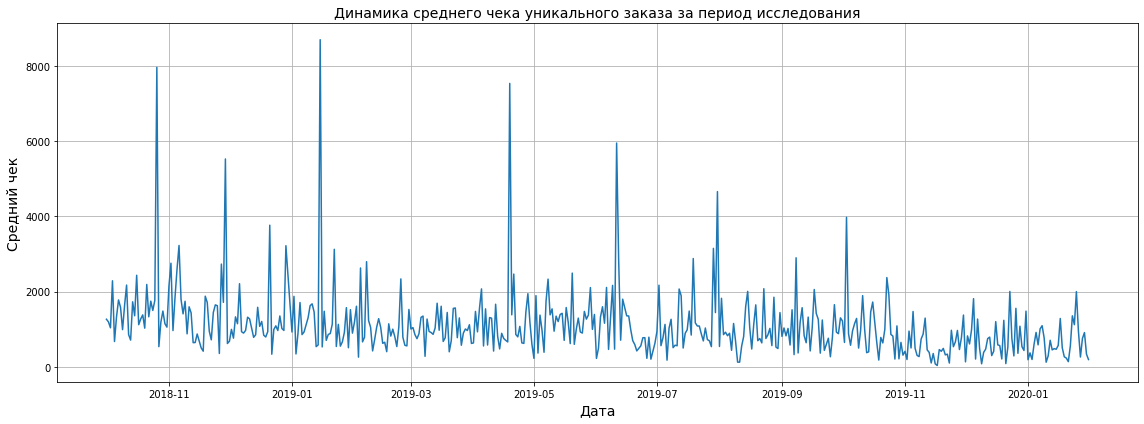

In [71]:
# Построение графика
plt.figure(figsize=(16, 6))
sns.lineplot(x=average_check_daily.index, y=average_check_daily.values)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Средний чек', fontsize=14)
plt.title('Динамика среднего чека уникального заказа за период исследования', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [72]:
average_check_daily.describe()

count     483.000000
mean     1104.581251
std       894.973485
min        37.000000
25%       586.276515
50%       931.250000
75%      1367.333333
max      8693.666667
Name: total_revenue, dtype: float64

***Вывод:***
    
    1. Из графика видим что большая часть средних чеков находится в диапазоне до 2000р по всему периоду исследования. 
    2. Есть средние чеки от 3000  до  6000 р в ноябре, декабре,январе, апреле, июне, июле, сентябре, октябре месяце.   

### Создадим  помесячную среднюю выручку с  покупателя, построим график помесячной динамики выручки ###

In [73]:
df_e.head()

,date,customer_id,order_id,product,quantity,price,categories,month,year,total_revenue
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,растения,10,2018,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,растения,10,2018,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,растения,10,2018,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,растения,10,2018,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,растения,10,2018,112.0


In [74]:
# группируем по году, месяцу и customer_id, суммируем выручку для каждого уникального покупателя в каждом месяце
monthly_revenue_unique = df_e.groupby(['year', 'month', 'customer_id'])['total_revenue'].sum().reset_index()
monthly_revenue_unique

,year,month,customer_id,total_revenue
0,2018,10,005ba170-45e8-42de-93f7-192481ae2659,1199.0
1,2018,10,00bd74b1-2792-47db-a2f1-680a09ac5026,937.0
2,2018,10,03b7b4a5-9e2c-42f9-a131-96f3d2772f17,1574.0
3,2018,10,055119fa-4ffb-4780-a696-3cf6808daadf,427.0
4,2018,10,092ef2d7-30d2-4d15-9c40-35af6973f28b,2324.0
...,...,...,...,...
3175,2020,1,fc4b5242-d331-4643-951d-90d2d4fe0382,899.0
3176,2020,1,fc736e7c-c505-4467-8437-f83a4a131f92,1049.0
3177,2020,1,fd9e34ca-13c6-486d-bc47-366fbfe488f8,2249.0
3178,2020,1,fe2ef13a-4c8f-4cad-9c2d-49b535b5857e,374.0


In [75]:
# группируем по году и месяцу, находим среднюю выручку
average_monthly_revenue = monthly_revenue_unique.groupby(['year', 'month'])['total_revenue'].mean()
average_monthly_revenue

year  month
2018  10       1961.798883
      11       2018.808989
      12       1519.513158
2019  1        1544.275168
      2        1250.750000
      3        1106.087719
      4        1346.676596
      5        1444.206061
      6        1532.637584
      7        1265.645161
      8        1049.390244
      9        1040.649123
      10       1206.052326
      11        593.510369
      12        824.737127
2020  1         646.975217
Name: total_revenue, dtype: float64

In [76]:
# преобразуем индекс к удобному виду для построения графика
average_monthly_revenue.index = average_monthly_revenue.index.map(lambda x: str(x[0]) + '-' + str(x[1]))

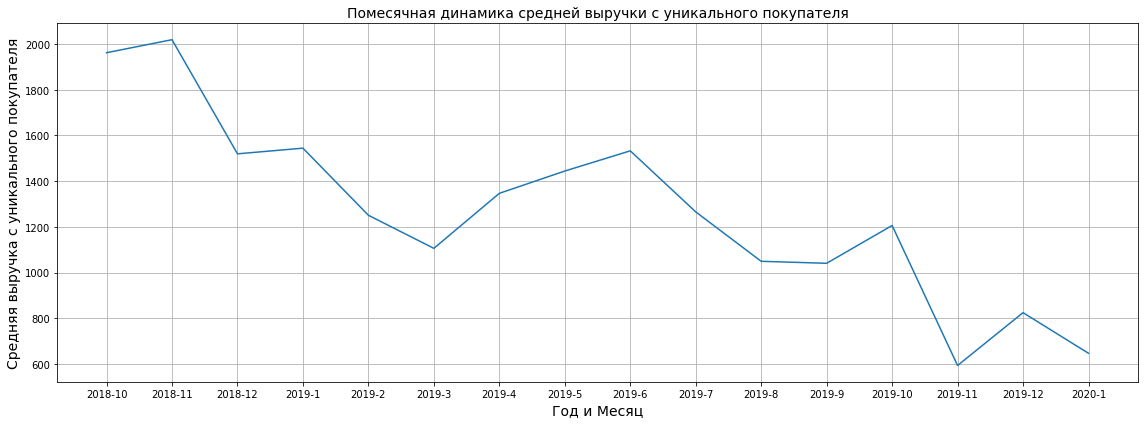

In [77]:
# построим график
plt.figure(figsize=(16, 6))
sns.lineplot(x=average_monthly_revenue.index, y=average_monthly_revenue.values)
plt.xlabel('Год и Месяц', fontsize=14)
plt.ylabel('Средняя выручка с уникального покупателя', fontsize=14)
plt.title('Помесячная динамика средней выручки с уникального покупателя', fontsize=14)
#plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

***Вывод***

График показывает падение средней выручки  в периоде с октября 2018г по апрель 2019г с 1700 до 1100р, подъем до 1300р в мае, затем снижение до 650р к концу периода. 

***Вывод***

1. В данных был представлен покупатель с заказом в размере 675т.р -удалили его, т.к. данная сумма покупки может исказить размер среднего чека и средней выручки интернет-магазина, а также повлиять на динамику этих показателей.
2. График общей выручки в течении всего периода находится в диапазоне от 3000 до 7000р. Выручка в октябре, ноябре, декабре 18г, январе и июне 19г от 25000 до 50000р.
3. График среднего чека показывает его нахождение в диапазоне до 2000р по всему периоду исследования. Есть средние чеки от 3000  до  6000 р в ноябре, декабре,январе, апреле, июне, июле, сентябре, октябре месяце.
4. График динамики средней выручки с покупателя показывает падение средней выручки в периоде с октября 2018г по апрель 2019г с 1700 до 1100р, подъем до 1300р в мае, затем снижение до 650р к концу периода.  

## Составим портрет пользователя по истории покупок ##

### Сегментируем покупателей методом RFM (давность покупки, частота покупок, сумма покупок) ###

In [78]:
df_e.head()

,date,customer_id,order_id,product,quantity,price,categories,month,year,total_revenue
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,растения,10,2018,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,растения,10,2018,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,растения,10,2018,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,растения,10,2018,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,растения,10,2018,112.0


In [79]:
# копируем DF
df_copy = df_e.copy()
df_copy.head()

,date,customer_id,order_id,product,quantity,price,categories,month,year,total_revenue
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,растения,10,2018,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,растения,10,2018,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,растения,10,2018,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,растения,10,2018,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,растения,10,2018,112.0


In [80]:
# оставим в копии столбцы покупатель, заказ, дата, выручка
df_co = df_copy[['customer_id', 'order_id', 'date', 'total_revenue']]
df_co.head()

,customer_id,order_id,date,total_revenue
0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,2018-10-01,142.0
1,ee47d746-6d2f-4d3c-9622-c31412542920,68477,2018-10-01,194.0
2,ee47d746-6d2f-4d3c-9622-c31412542920,68477,2018-10-01,112.0
3,ee47d746-6d2f-4d3c-9622-c31412542920,68477,2018-10-01,179.0
4,ee47d746-6d2f-4d3c-9622-c31412542920,68477,2018-10-01,112.0


In [81]:
df_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5542 entries, 0 to 5542
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    5542 non-null   object        
 1   order_id       5542 non-null   int64         
 2   date           5542 non-null   datetime64[ns]
 3   total_revenue  5542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 216.5+ KB


In [82]:
# определим последнюю дату заказа в периоде
last_date = df_co['date'].max() + timedelta(days=1)
last_date

Timestamp('2020-02-01 15:00:00')

In [83]:
# создадим таблицу RFM
rfm_table = df_co.groupby('customer_id').agg({'date': lambda x: (last_date - x.max()).days, # Recency
                                                'order_id': lambda x: len(x.unique()), # Frequency
                                                'total_revenue': lambda x: x.sum()})    # Monetary 

rfm_table['date'] = rfm_table['date'].astype(int)

rfm_table.rename(columns={'date': 'recency', 
                         'order_id': 'frequency',
                         'total_revenue': 'monetary_value'}, inplace=True)
rfm_table = rfm_table.reset_index()
rfm_table.sample(6)

,customer_id,recency,frequency,monetary_value
834,59e17b55-c6b8-4572-968a-50913ce64b89,464,1,644.0
666,4661c3e3-a378-4648-9479-bb9135ac3ab3,44,2,269.0
616,411ab440-0631-422d-9999-8d5ef8cec0e2,356,1,88.0
1742,ba3f3dd5-f63d-4744-823b-4f6c96bc46fd,59,2,1971.0
432,2e417f2d-bf97-486f-a406-e9da0dbd47f0,468,1,3147.0
2215,ed0ff3ae-e963-4eef-a969-013bfe62d711,115,1,599.0


Используя квантили разабьем всех покупателей на группы от 1 до 3 баллов:
   - 1 бал - мало закаывает, маленький средний чек, давно покупал,
   - 2 - средние показатели 
   - 3 - соответственно высокие

In [84]:
quantiles = rfm_table.quantile(q=[0.33,0.66])
quantiles

,recency,frequency,monetary_value
0.33,104.0,1.0,524.00
0.66,300.0,2.0,1326.26


In [85]:
# переведем квантили в словарь
quantiles = quantiles.to_dict()

In [86]:
#  сделаем копию таблицы сегментации
rfm_segment = rfm_table.copy()

In [87]:
# функция для recency (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.33]:
        return 3
    elif x <= d[p][0.66]: 
        return 2
    else:
        return 1
    
# функция для monetary_value, frequency (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.33]:
        return 1
    elif x <= d[p][0.66]:
        return 2
    else:
        return 3
# присваиваем квартили сегментам    
rfm_segment['r_quartile'] = rfm_segment['recency'].apply(R_Class, args=('recency',quantiles,))
rfm_segment['f_quartile'] = rfm_segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
rfm_segment['m_quartile'] = rfm_segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))
# сумма балов по параметрам сегментации
rfm_segment['rfmclass'] = rfm_segment.r_quartile.map(str) \
                            + rfm_segment.f_quartile.map(str) \
                            + rfm_segment.m_quartile.map(str)

In [88]:
# получим таблицу с профилями пользователей
rfm_segment.head()

,customer_id,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfmclass
0,000d6849-084e-4d9f-ac03-37174eaf60c4,108,1,555.0,2,1,2,212
1,001cee7f-0b29-4716-b202-0042213ab038,350,1,442.0,1,1,1,111
2,00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0,2,1,2,212
3,002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0,1,1,3,113
4,003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0,2,1,3,213


In [89]:
# функция для присвоения вида сегмента покупателям по их RFM оценкам
def assign_segment(row): 
    rfm = row['rfmclass']
    if rfm == '333':
        return 'Ценные покупатели' 
    elif rfm[0] == '3' and rfm[1] == '2':
        return 'Ценные покупатели' 
    elif rfm == '111':
        return 'Спящие покупатели' 
    elif rfm[0] == '1' and rfm[1] == '2':
        return 'Спящие покупатели' 
    elif rfm[0] == '3' and rfm[1] == '3': 
        return 'Ценные покупатели'
    else:
        return 'Лояльные покупатели'

rfm_segment['segment'] = rfm_segment.apply(assign_segment, axis=1) 
rfm_segment

,customer_id,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfmclass,segment
0,000d6849-084e-4d9f-ac03-37174eaf60c4,108,1,555.0,2,1,2,212,Лояльные покупатели
1,001cee7f-0b29-4716-b202-0042213ab038,350,1,442.0,1,1,1,111,Спящие покупатели
2,00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0,2,1,2,212,Лояльные покупатели
3,002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0,1,1,3,113,Лояльные покупатели
4,003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0,2,1,3,213,Лояльные покупатели
...,...,...,...,...,...,...,...,...,...
2407,ff601403-b094-4b86-9ac6-264d725b9277,13,2,1739.0,3,2,3,323,Ценные покупатели
2408,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,94,1,397.0,3,1,1,311,Лояльные покупатели
2409,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,413,1,389.0,1,1,1,111,Спящие покупатели
2410,ffb80538-3fda-4351-8ea9-9d2bec58bb07,145,1,974.0,2,1,2,212,Лояльные покупатели


#### Анализ сегментов покупателей по их количеству ####

In [90]:
# считаем количество покупателей по сегментам
segment_counts = rfm_segment['segment'].value_counts().sort_index().sort_values()
segment_counts

Спящие покупатели       322
Ценные покупатели       725
Лояльные покупатели    1365
Name: segment, dtype: int64

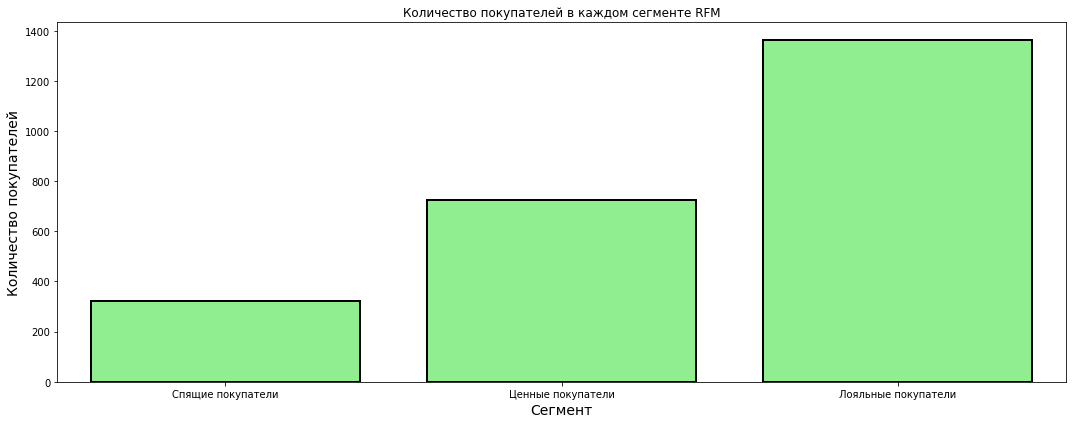

In [91]:
# Построение столбчатой диаграммы
plt.figure(figsize=(15, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, facecolor='lightgreen', edgecolor='black', linewidth=2)
plt.xlabel('Сегмент', fontsize=14)
plt.ylabel('Количество покупателей', fontsize=14)
plt.title('Количество покупателей в каждом сегменте RFM')
#plt.xticks(ha='right')
plt.tight_layout()
plt.show()

In [92]:
# посмотрим сколько покупателей имеют оценку 333
len(rfm_segment[rfm_segment['rfmclass']=='333'].sort_values('monetary_value', ascending=False))

1

In [93]:
# посмотрим сколько клиентов входит в категорию совсем спящих
len(rfm_segment[rfm_segment['rfmclass']=='111'].sort_values('recency',ascending=False))

269

***Вывод:***

1. Всего в данных 2388 покупателй, из них 1 покупатель с выокой оценкой RFM - 333.
2. Группа Ценных покупателей 725человек, состоит из следующих сегментов:
  - 333 недавно покупали, часто покупают, высокий средний чек 
  - 313 недавно покупали, не часто покупают, высокий средний чек
  - 321 недавно покупали, часто покупают, низкий средний чек
  - 322 недавно покупали, часто покупают, средний чек
  - 323 недавно покупали, часто покупают, высокий средний чек
  - 331 недавно покупали, много покупок, низкий средний чек
  - 332 недавно покупали, много покупают, средний чек
3. В группу Спящих покупателей (322 покупателя) входят следующие сегменты:
  - 111 давно покупали, не часто покупали, низкий средний чек - 269 покупателя в этом сегменте
  - 121 давно покупали, часто покупали, низкий средний чек
  - 123 давно покупали, часто покупали, высокий средний чек
  - 131 давно покупали, много покупали, низкий средний чек
  - 132 давно покупали, много покупали, средний чек
  - 133 давно покупали, много покупали, высокий средний чек
4. К Лояльным покупателям относятся все средние покупатели в количестве 1365.

#### Анализ сегментов покупателей  по среднему чеку ####

In [94]:
rfm_segment.head()

,customer_id,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfmclass,segment
0,000d6849-084e-4d9f-ac03-37174eaf60c4,108,1,555.0,2,1,2,212,Лояльные покупатели
1,001cee7f-0b29-4716-b202-0042213ab038,350,1,442.0,1,1,1,111,Спящие покупатели
2,00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0,2,1,2,212,Лояльные покупатели
3,002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0,1,1,3,113,Лояльные покупатели
4,003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0,2,1,3,213,Лояльные покупатели


In [95]:
df_e.head()

,date,customer_id,order_id,product,quantity,price,categories,month,year,total_revenue
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,растения,10,2018,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,растения,10,2018,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,растения,10,2018,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,растения,10,2018,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,растения,10,2018,112.0


In [96]:
# добавляем в основную таблицу сегмент покупателя
df_e = pd.merge(df_e, rfm_segment[['customer_id', 'segment']], on='customer_id', how='left')
df_e.head()

,date,customer_id,order_id,product,quantity,price,categories,month,year,total_revenue,segment
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,растения,10,2018,142.0,Лояльные покупатели
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,растения,10,2018,194.0,Лояльные покупатели
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,растения,10,2018,112.0,Лояльные покупатели
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,растения,10,2018,179.0,Лояльные покупатели
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,растения,10,2018,112.0,Лояльные покупатели


In [97]:
# посчитаем по сегментам выручку и количество заказов
segment_summary = df_e.groupby('segment').agg({'total_revenue': 'sum', 'order_id': 'nunique'}).reset_index()
segment_summary

,segment,total_revenue,order_id
0,Лояльные покупатели,2.434692e+06,1652
1,Спящие покупатели,2.169580e+05,375
2,Ценные покупатели,1.274518e+06,1465


In [98]:
# добавим столбец среднего чека
segment_summary['average_revenue'] = (segment_summary['total_revenue'] / segment_summary['order_id']).round()
segment_summary 

,segment,total_revenue,order_id,average_revenue
0,Лояльные покупатели,2.434692e+06,1652,1474.0
1,Спящие покупатели,2.169580e+05,375,579.0
2,Ценные покупатели,1.274518e+06,1465,870.0


In [99]:
segment_summary = segment_summary[['segment', 'average_revenue']]
segment_summary_sorted = segment_summary.sort_values(by='average_revenue')
segment_summary_sorted

,segment,average_revenue
1,Спящие покупатели,579.0
2,Ценные покупатели,870.0
0,Лояльные покупатели,1474.0


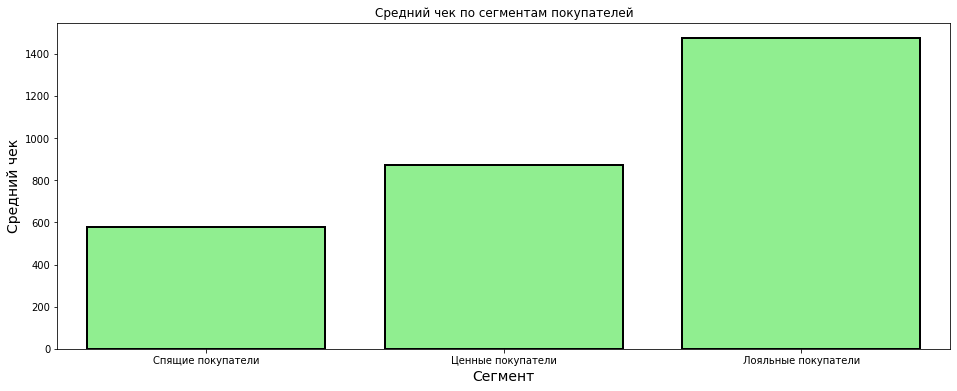

In [100]:
# Построение столбчатой диаграммы
plt.figure(figsize=(16, 6))
sns.barplot(x='segment', y='average_revenue', data=segment_summary_sorted, facecolor='lightgreen', edgecolor='black', linewidth=2)
plt.xlabel('Сегмент', fontsize=14)
plt.ylabel('Средний чек', fontsize=14)
plt.title('Средний чек по сегментам покупателей')
plt.show()

***Вывод***
Средний дневной чек:
  - Спящих покупателей 579р.
  - Ценные покупатели 870р.
  - Лояльные покупатели 1474р.

#### Анализ сегментов покупателей по основным продуктам и категории товаров ####

In [101]:
df_e.head()

,date,customer_id,order_id,product,quantity,price,categories,month,year,total_revenue,segment
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,растения,10,2018,142.0,Лояльные покупатели
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,растения,10,2018,194.0,Лояльные покупатели
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,растения,10,2018,112.0,Лояльные покупатели
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,растения,10,2018,179.0,Лояльные покупатели
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,растения,10,2018,112.0,Лояльные покупатели


In [102]:
# группируем данные по сегменту и продукту, считаем количество продуктов
product_counts = df_e.groupby(['segment', 'product'])['product'].count().unstack()
"\nКоличество каждого товара в каждом сегменте:\n", product_counts

('\nКоличество каждого товара в каждом сегменте:\n',
 product              tepмокружка avex freeflow 700 мл зеленый avex0759  \
 segment                                                                  
 Лояльные покупатели                                                NaN   
 Спящие покупатели                                                  NaN   
 Ценные покупатели                                                  2.0   
 
 product              tepмокружка avex freeflow 700 мл сталь avex0776  \
 segment                                                                
 Лояльные покупатели                                              1.0   
 Спящие покупатели                                                NaN   
 Ценные покупатели                                                NaN   
 
 product              tepмокружка avex recharge 500 мл голубой avex0681  \
 segment                                                                  
 Лояльные покупатели                                 

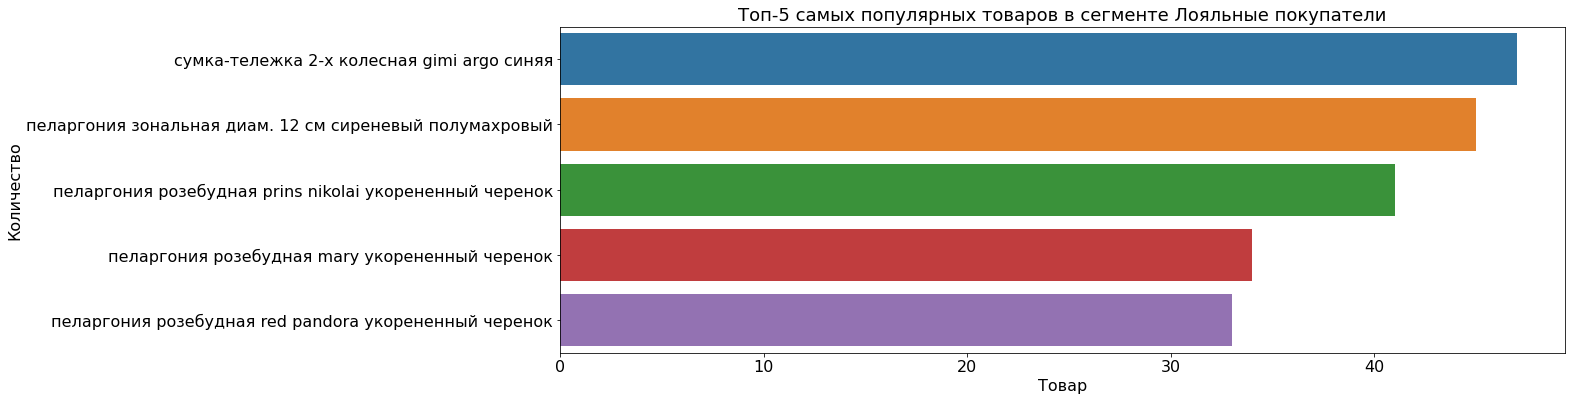

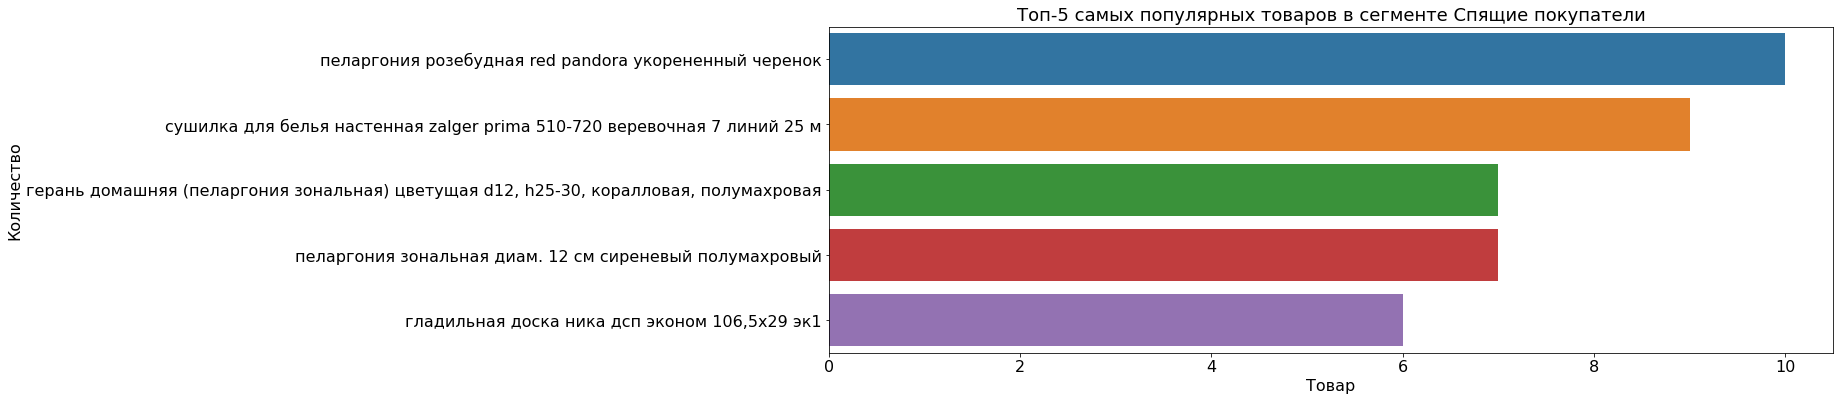

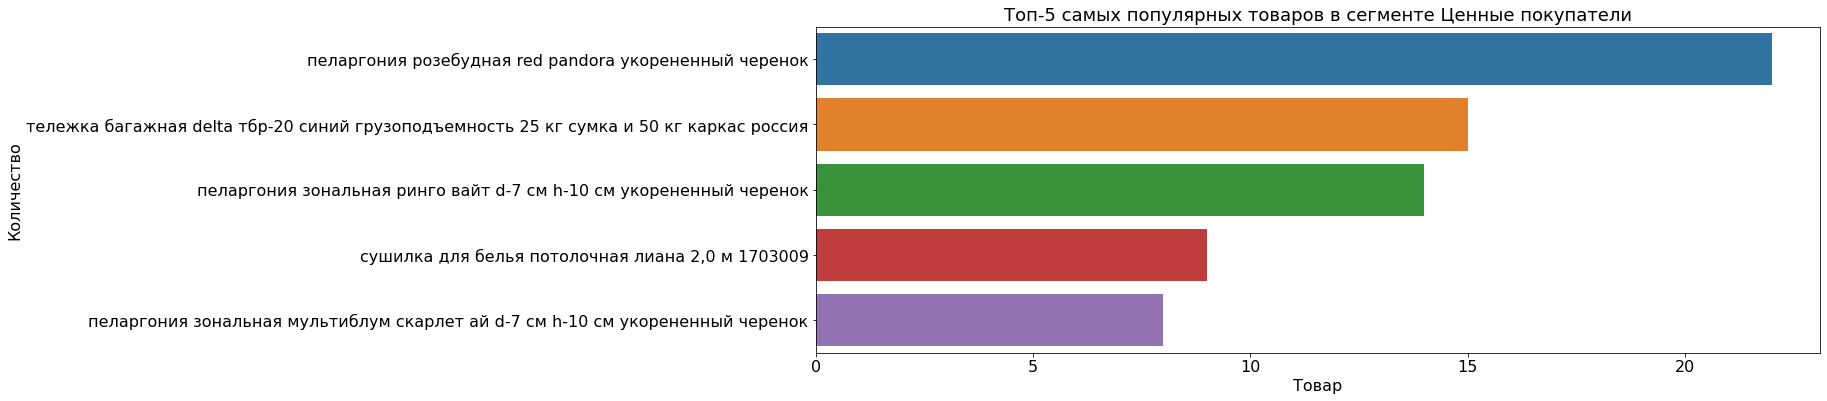

In [103]:
# график самых популярных продуктов в каждом сегментеб возьмем топ 5
top_n = 5
unique_products = sorted(product_counts.columns.tolist())
product_colors = dict(zip(unique_products, sns.color_palette("tab20", len(unique_products))))
for segment in product_counts.index:
    top_products = product_counts.loc[segment].sort_values(ascending=False).head(top_n)
    plt.figure(figsize=(18, 6))
    sns.barplot(x=top_products.values, y=top_products.index)
    plt.xlabel('Товар', fontsize=16)
    plt.ylabel('Количество', fontsize=16)
    plt.title(f'Топ-{top_n} самых популярных товаров в сегменте {segment}', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.show()

In [104]:
# группируем данные по сегменту, категорий и считаем продуктов категорий
category_counts = df_e.groupby(['segment', 'categories'])['product'].count().unstack()
display('Количество приобретенных товаров каждой категории в сегменте:', category_counts)

'Количество приобретенных товаров каждой категории в сегменте:'

categories,бытовая_химия,бытовые_приборы,декор,кухонная_посуда,общая,растения,хозтовары
segment,,,,,,,
Лояльные покупатели,29,20,187,157,7,1975,1191
Спящие покупатели,8,3,71,47,1,199,182
Ценные покупатели,10,28,43,92,2,411,879


In [105]:
df_e.groupby(['segment', 'categories'])['product'].nunique().unstack()

categories,бытовая_химия,бытовые_приборы,декор,кухонная_посуда,общая,растения,хозтовары
segment,,,,,,,
Лояльные покупатели,26,20,110,138,6,781,727
Спящие покупатели,8,2,46,40,1,110,139
Ценные покупатели,5,18,34,65,2,244,458


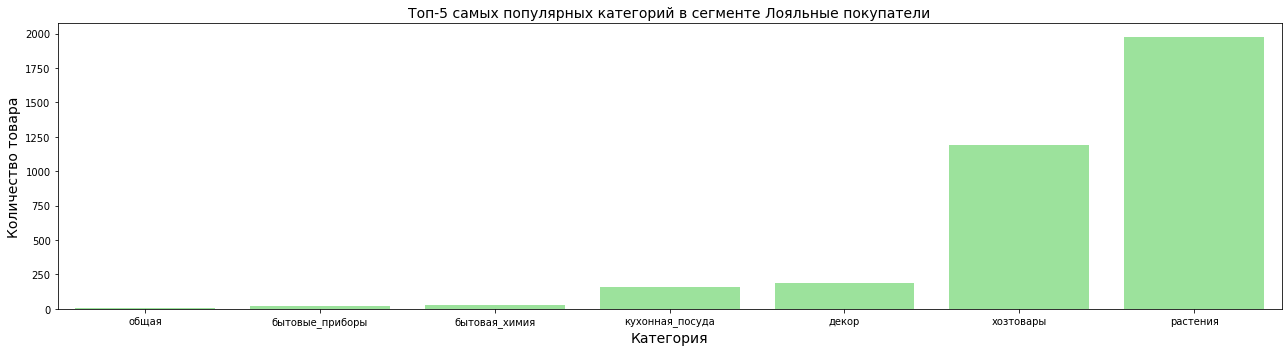

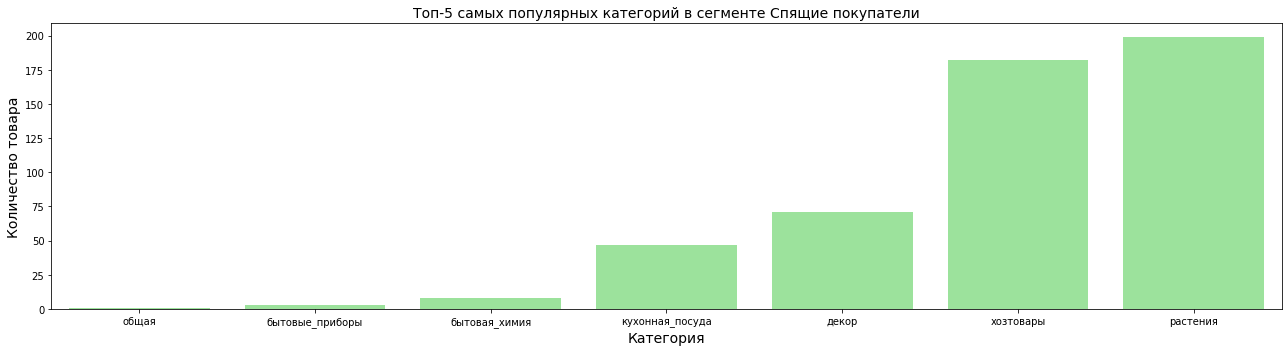

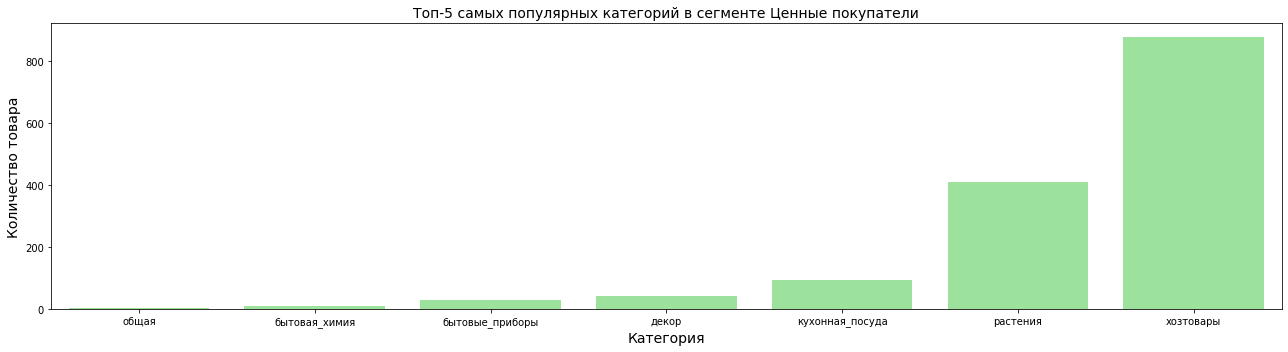

In [106]:
# график популярности категорий в каждом сегменте

for segment in category_counts.index:
    top_categories = category_counts.loc[segment].sort_values()
    
    plt.figure(figsize=(18, 5))
    sns.barplot(x=top_categories.index, y=top_categories.values, color="lightgreen")
    plt.xlabel('Категория', fontsize=14)
    plt.ylabel('Количество товара', fontsize=14)
    plt.title(f'Топ-{top_n} самых популярных категорий в сегменте {segment}', fontsize=14)
    plt.tight_layout()
    plt.show()

***Вывод***

1. В топ 5 продуктов входит для каждого сегмента покупателя:
   - Лояльные покупатели:цветы пеларгония (ее виды), сумка тележка
   - Спящие покупатели: сушилка для белья, виды цветов пеларгония
   - Ценные покупатели: цветы пеларгонии, сумка_тележка.
2. Топ категорий для сегментов покупателей:
   - Лояльные покупатели:растения, хозтовары, декор, кухонная посуда, быт.химия, быт.приборы, общая
   - Спящие покупатели: растения, хозтовары, декор, кухонная посуда, бытовая химия, бытовые приборы, общая
   - Ценные покупатели: хозтовары, растения, кухонная посуда, декор, быт. приборы, быт. химия, общая

### Анализ категорий товаров и их сезонность по выделенным сегментам покупателей ###

In [107]:
df = df_e.copy()

In [108]:
# сгруппируем новую таблицу
df = df.groupby(['year','month', 'segment', 'categories'])['total_revenue'].sum().reset_index()
df.head(20)

,year,month,segment,categories,total_revenue
0,2018,10,Лояльные покупатели,бытовая_химия,1089.0
1,2018,10,Лояльные покупатели,бытовые_приборы,2998.0
2,2018,10,Лояльные покупатели,декор,10324.0
3,2018,10,Лояльные покупатели,кухонная_посуда,23599.0
4,2018,10,Лояльные покупатели,растения,24319.0
5,2018,10,Лояльные покупатели,хозтовары,215975.0
6,2018,10,Спящие покупатели,декор,1346.0
7,2018,10,Спящие покупатели,кухонная_посуда,1302.0
8,2018,10,Спящие покупатели,растения,4867.0
9,2018,10,Спящие покупатели,хозтовары,9375.0


In [109]:
# создаем соответствие каждой категории своему цвету
categories = df['categories'].unique()
num_categories = len(categories)
palette = sns.color_palette("tab10", num_categories)

In [110]:
category_colors = dict(zip(categories, palette))

In [111]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))

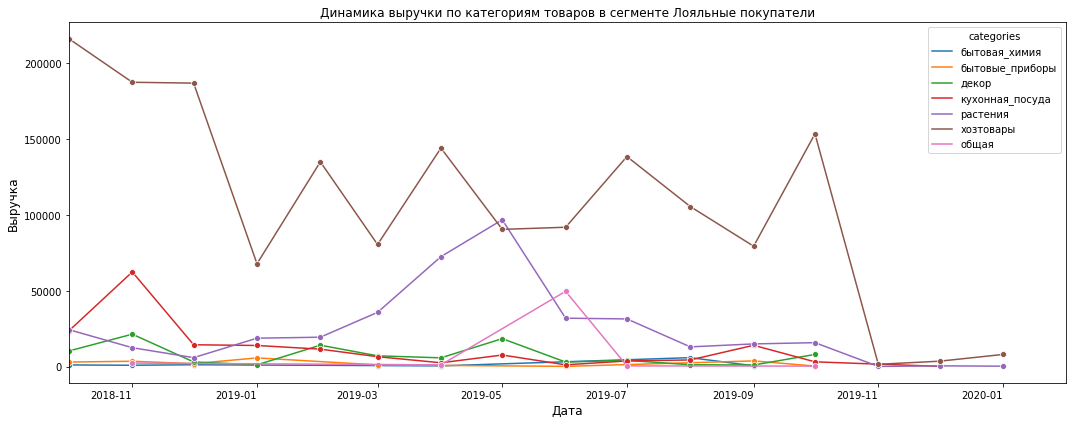

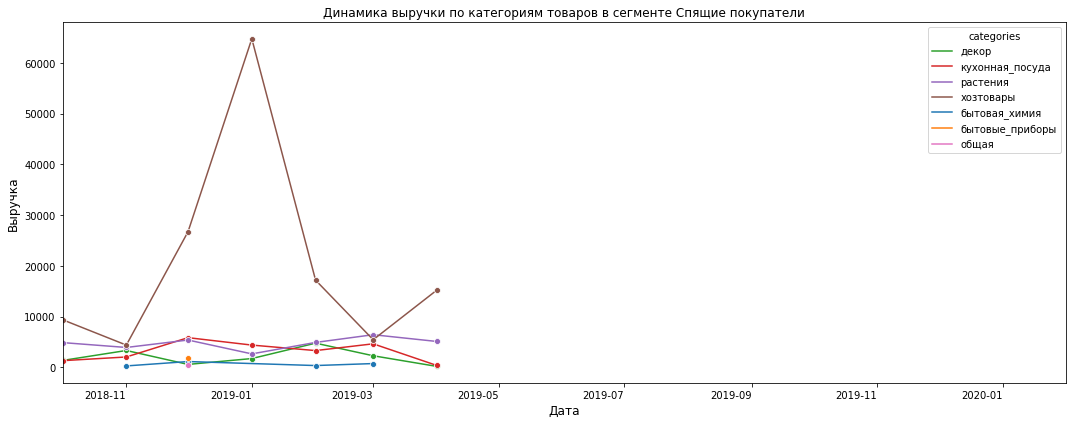

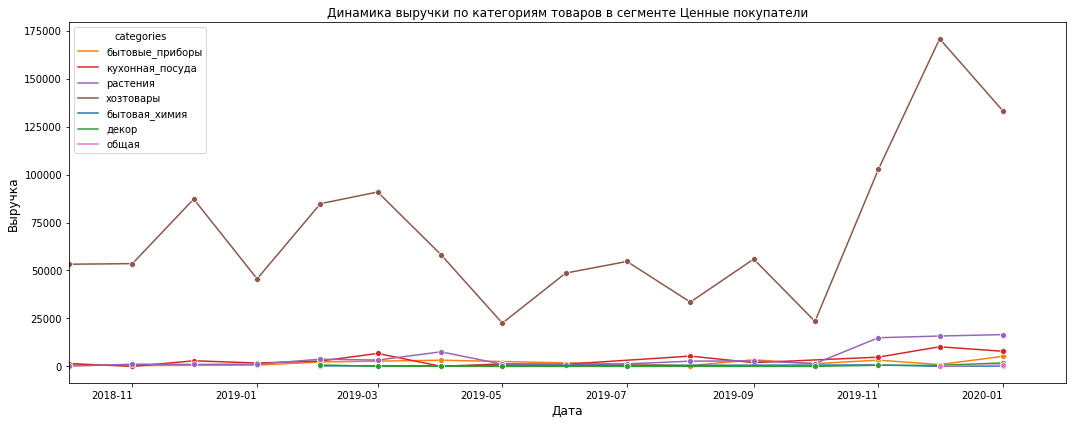

In [112]:
segments = df['segment'].unique()
for i, segment in enumerate(segments):
    segment_data = df[df['segment'] == segment]
    plt.figure(figsize=(15, 6))
    ax = sns.lineplot(data=segment_data, x='date', y='total_revenue', hue='categories', marker='o', palette=category_colors) # Use category_colors here
    plt.xlabel('Дата', fontsize=12)
    plt.ylabel('Выручка', fontsize=12)
    plt.title(f'Динамика выручки по категориям товаров в сегменте {segment}')
    plt.xticks(ha='right')
    start_date = pd.to_datetime(df_e['date'].min()) 
    end_date = pd.to_datetime(df_e['date'].max())
    ax.set_xlim([start_date, end_date])
    plt.tight_layout()
    plt.show()

***Вывод***

1. В сегменте Лояльные покупатели  наибольшую выручку показала категория хозтовары, вторая категория по выручке - растения с пиком выручки в мае. Остальные категории имеют низкую выручку в течении всего периода в районе до 25000р без роста.
2. Лидером по выручке в сегменте Ценные покупатели является категория хозтовары с пиком в декабре 18г, марте и декабре 19г. Остальные категории движутся группой и имеют выручку до 10000р в месяц на протяжении всего периода анализа, лишь категория растения увеличивае выручку свыше 10000р с ноября 19г и до конца периода анализа.
3. Сегмент Спящие покупатели в начале периода имел лидером по выручке категории хозтовары и растения с пиком выручки в январе (свыше 60000р) и марте (15000р) соответственно для категорий. С апреля 19г данных о покупках в интернет-магазиине сегментом нет.


### Вывод: ###

1. Всего в данных 2412 покупателй.
   - группа Ценных покупателей 725 человек (1 с высокой оценкой 333):
   - группа Спящих покупателей  - 322 
   - группа Лояльные покупатели - 1365
2. Средний дневной чек Спящих покупателей 579р, Ценных покупателей 870р, Лояльных покупателей 1474р.
3. В топ 5 продуктов входит для каждого сегмента покупателя:
   - Лояльные покупатели:цветы пеларгония (ее виды), сумка тележка
   - Спящие покупатели: сушилка для белья, виды цветов пеларгония
   - Ценные покупатели: цветы пеларгонии, сумка_тележка  
4. Топ категорий для сегментов покупателей:
   - Лояльные покупатели:растения, хозтовары, декор, кухонная посуда, быт.химия, быт.приборы, общая
   - Спящие покупатели: растения, хозтовары, декор, кухонная посуда, бытовая химия, бытовые приборы, общая
   - Ценные покупатели: хозтовары, растения, кухонная посуда, декор, быт. приборы, быт. химия, общая
5. По динамике выручки по категориям товаров в сегменах выделяются категории:
   - в сегменте Лояльные покупатели наибольшую выручку показала категория хозтовары, вторая категория по выручке - растения с пиком выручки в мае. Остальные категории имеют низкую выручку в течении всего периода в районе до 25000р без роста.
   - лидером по выручке в сегменте Ценные покупатели является категория хозтовары с пиком в декабре 18г, марте и декабре 19г. Остальные категории движутся группой и имеют выручку до 10000р в месяц на протяжении всего периода анализа, лишь категория растения увеличивае выручку свыше 10000р с ноября 19г и до конца периода анализа.
   - сегмент Спящие покупатели в начале периода имел лидером по выручке категории хозтовары и растения с пиком выручки в январе (свыше 60000р) и марте (15000р) соответственно для категорий. С апреля 19г данных о покупках в интернет-магазиине сегментом нет.

## Проверка статистических гипотез ##

### Гипотеза 1. Нет различий в среднем дневном чеке между сегментированными группами покупателя ###

**Условия:**

    - Н0: Между средними дневными чеками сегментов покупателей нет статистически значимой разницы
    - Н1: Между средними дневными чеками сегментов покупателей есть статистически значимая разница

In [113]:
# получаем на каждый заказ каждого покупателя каждого сегмента чек покупки
df_date = df_e.copy()
df_date['date_only'] = df_date['date'].dt.date
order_totals = df_date.groupby(['date_only', 'segment', 'order_id'])['total_revenue'].sum().reset_index()
order_totals.head(20)

,date_only,segment,order_id,total_revenue
0,2018-10-01,Лояльные покупатели,68474,3299.0
1,2018-10-01,Лояльные покупатели,68476,2374.0
2,2018-10-01,Лояльные покупатели,68477,1037.0
3,2018-10-01,Лояльные покупатели,68479,824.0
4,2018-10-01,Лояльные покупатели,68480,674.0
5,2018-10-01,Лояльные покупатели,68483,820.0
6,2018-10-01,Лояльные покупатели,68485,187.0
7,2018-10-01,Лояльные покупатели,68486,3648.0
8,2018-10-01,Ценные покупатели,68478,269.0
9,2018-10-01,Ценные покупатели,68484,614.0


In [114]:
average_check_by_segment_day = (order_totals.groupby(['date_only', 'segment'])
                                .agg({'total_revenue':'sum', 'order_id':'count'})
                                .reset_index())
average_check_by_segment_day

,date_only,segment,total_revenue,order_id
0,2018-10-01,Лояльные покупатели,12863.0,8
1,2018-10-01,Ценные покупатели,1071.0,3
2,2018-10-02,Лояльные покупатели,11397.0,8
3,2018-10-02,Спящие покупатели,1825.0,5
4,2018-10-02,Ценные покупатели,3524.0,1
...,...,...,...,...
944,2020-01-28,Ценные покупатели,6057.0,8
945,2020-01-29,Лояльные покупатели,15.0,1
946,2020-01-29,Ценные покупатели,5456.0,5
947,2020-01-30,Ценные покупатели,1019.0,3


In [115]:
average_check_by_segment_day['average_check'] = (average_check_by_segment_day['total_revenue'] 
                                                   / average_check_by_segment_day['order_id']).round()
average_check_by_segment_day

,date_only,segment,total_revenue,order_id,average_check
0,2018-10-01,Лояльные покупатели,12863.0,8,1608.0
1,2018-10-01,Ценные покупатели,1071.0,3,357.0
2,2018-10-02,Лояльные покупатели,11397.0,8,1425.0
3,2018-10-02,Спящие покупатели,1825.0,5,365.0
4,2018-10-02,Ценные покупатели,3524.0,1,3524.0
...,...,...,...,...,...
944,2020-01-28,Ценные покупатели,6057.0,8,757.0
945,2020-01-29,Лояльные покупатели,15.0,1,15.0
946,2020-01-29,Ценные покупатели,5456.0,5,1091.0
947,2020-01-30,Ценные покупатели,1019.0,3,340.0


In [116]:
average_check_by_segment_day = average_check_by_segment_day[['date_only', 'segment', 'average_check']]
average_check_by_segment_day

,date_only,segment,average_check
0,2018-10-01,Лояльные покупатели,1608.0
1,2018-10-01,Ценные покупатели,357.0
2,2018-10-02,Лояльные покупатели,1425.0
3,2018-10-02,Спящие покупатели,365.0
4,2018-10-02,Ценные покупатели,3524.0
...,...,...,...
944,2020-01-28,Ценные покупатели,757.0
945,2020-01-29,Лояльные покупатели,15.0
946,2020-01-29,Ценные покупатели,1091.0
947,2020-01-30,Ценные покупатели,340.0


In [117]:
# # группируем данные по сегментам и среднему чеку
loyal = average_check_by_segment_day[average_check_by_segment_day['segment'] == 'Лояльные покупатели']['average_check']
sleeping = average_check_by_segment_day[average_check_by_segment_day['segment'] == 'Спящие покупатели']['average_check']
valuable = average_check_by_segment_day[average_check_by_segment_day['segment'] == 'Ценные покупатели']['average_check']

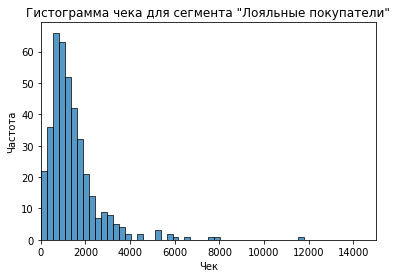

In [118]:
# посмотрим как распределяется чек в каждой категории с помощью гисторгаммы 
# чек лояльных покупателей
sns.histplot(loyal) 
plt.xlabel('Чек')
plt.ylabel('Частота')
plt.xlim(0,15000)
plt.title('Гистограмма чека для сегмента "Лояльные покупатели"')
plt.show()

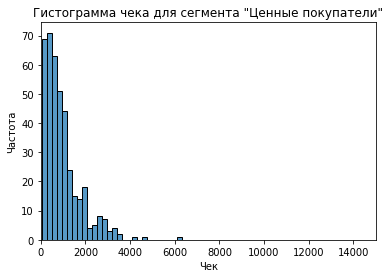

In [119]:
# чек ценных покупателей
sns.histplot(valuable)
plt.xlabel('Чек')
plt.ylabel('Частота')
plt.xlim(0, 15000)
plt.title('Гистограмма чека для сегмента "Ценные покупатели"')
plt.show()

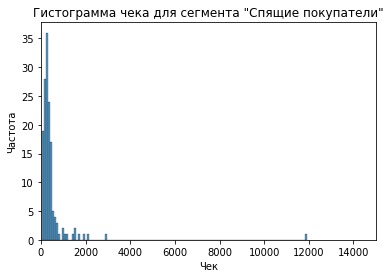

In [120]:
# чек спящих покупателей
sns.histplot(sleeping)
plt.xlabel('Чек')
plt.ylabel('Частота')
plt.xlim(0, 15000)
plt.title('Гистограмма чека для сегмента "Спящие покупатели"')
plt.show()

Гистограмма среднего чека для всех сегментов имеет форму половины колокола, расположенной справа (т. е. данные сильно смещены вправо, с длинным хвостом вправо и скоплением значений слева), это указывает на ненормальное распределение. Предположение о нормальности, необходимое для параметрических тестов (таких как t-тест), нарушается.
Поэтому для проверки гипотезы о равенстве средних чеков двух сегментов с таким распределением данных требуется использовать непараметрический тест Манна-Уитни (U-тест). Однако тест Манн-Уитни чаще обнаруживает неравенство в данных чем T-test, поэтому проверим гипотезу Т-тестом. 

In [121]:
# сформируем листы для написания цикла 
segm = [loyal, sleeping, valuable]
segment_list = ['Лояльные покупатели', 'Спящие покупатели', 'Ценные покупатели']

In [122]:
# проверим гипотезу Т-тестом
# уровень статистической значимости примем равный среднему принимаемому значению
alpha = 0.05
for index_0 in range(len(segm)):
    for index_1 in range(index_0+1, len(segm)):
        result = stats.ttest_ind(segm[index_0], segm[index_1], equal_var=False)
        print()
        print('Сравниваем сегмент:', segment_list[index_0], segment_list[index_1])
        print('р-значение:{:.4f}'.format(result.pvalue))
        print('Средний чек 1 сегмента: {:.0f}'.format(segm[index_0].mean()))
        print('Средний чек 2 сегмента: {:.0f}'.format(segm[index_1].mean()))
        if result.pvalue < alpha:
            print('Отвергаем H0, средние чеки в сегментах различаются')
        else:
            print('Не отвергаем нулевую гипотезу, нет достаточных оснований считать, что средние чеки в сегментах различаются')


Сравниваем сегмент: Лояльные покупатели Спящие покупатели
р-значение:0.0000
Средний чек 1 сегмента: 1421
Средний чек 2 сегмента: 480
Отвергаем H0, средние чеки в сегментах различаются

Сравниваем сегмент: Лояльные покупатели Ценные покупатели
р-значение:0.0000
Средний чек 1 сегмента: 1421
Средний чек 2 сегмента: 935
Отвергаем H0, средние чеки в сегментах различаются

Сравниваем сегмент: Спящие покупатели Ценные покупатели
р-значение:0.0000
Средний чек 1 сегмента: 480
Средний чек 2 сегмента: 935
Отвергаем H0, средние чеки в сегментах различаются


***Вывод***

 Сравнение средних чеков сегментов Лояльные - Спящие, Лояльные - Ценные и Ценные - Спящие показало различие в средних дневных чеках между этими сегментами.

### Гипотеза 2. Средняя выручка с покупателя сегментированных груп не имеет статистически значимой разницы ###

**Условия:**

    - Н0: Между средней выручкой с покупателя сегментированных групп покупателей нет статистически значимой разницы
    - Н1: Между средней выручкой с покупателя сегментированных групп покупателей есть статистически значимая разница

In [123]:
# группируем по покупателю, сегменту и ордеру сумму покупки
orders_totals = df_e.groupby(['segment', 'customer_id', 'order_id'])['total_revenue'].sum().reset_index()
orders_totals 

,segment,customer_id,order_id,total_revenue
0,Лояльные покупатели,000d6849-084e-4d9f-ac03-37174eaf60c4,14943,555.0
1,Лояльные покупатели,00299f34-5385-4d13-9aea-c80b81658e1b,72965,914.0
2,Лояльные покупатели,002d4d3a-4a59-406b-86ec-c3314357e498,69990,1649.0
3,Лояльные покупатели,003bbd39-0000-41ff-b7f9-2ddaec152037,72796,2324.0
4,Лояльные покупатели,004d24e9-4a6c-4d0e-8727-8391dfd4b43a,69987,1536.0
...,...,...,...,...
3487,Ценные покупатели,fe3e6382-3272-4045-8601-c9acfc08006f,106389,134.0
3488,Ценные покупатели,fef19457-5e7b-4d5d-b031-806041bc251a,69464,749.0
3489,Ценные покупатели,fef19457-5e7b-4d5d-b031-806041bc251a,106855,90.0
3490,Ценные покупатели,ff601403-b094-4b86-9ac6-264d725b9277,72313,1649.0


In [124]:
# считаем выручку на 1 покупателя
customer_totals = orders_totals.groupby(['segment','customer_id'])['total_revenue'].sum().reset_index()
customer_totals

,segment,customer_id,total_revenue
0,Лояльные покупатели,000d6849-084e-4d9f-ac03-37174eaf60c4,555.0
1,Лояльные покупатели,00299f34-5385-4d13-9aea-c80b81658e1b,914.0
2,Лояльные покупатели,002d4d3a-4a59-406b-86ec-c3314357e498,1649.0
3,Лояльные покупатели,003bbd39-0000-41ff-b7f9-2ddaec152037,2324.0
4,Лояльные покупатели,004d24e9-4a6c-4d0e-8727-8391dfd4b43a,1536.0
...,...,...,...
2407,Ценные покупатели,fd9e34ca-13c6-486d-bc47-366fbfe488f8,2384.0
2408,Ценные покупатели,fe2ef13a-4c8f-4cad-9c2d-49b535b5857e,2023.0
2409,Ценные покупатели,fe3e6382-3272-4045-8601-c9acfc08006f,636.0
2410,Ценные покупатели,fef19457-5e7b-4d5d-b031-806041bc251a,839.0


In [125]:
#
average_revenue_per_customer = customer_totals.groupby('segment')['total_revenue'].agg(['mean', 'count']).reset_index()
average_revenue_per_customer = (average_revenue_per_customer.rename(columns={'mean': 'average_revenue'})).round()
average_revenue_per_customer

,segment,average_revenue,count
0,Лояльные покупатели,1784.0,1365
1,Спящие покупатели,674.0,322
2,Ценные покупатели,1758.0,725


In [126]:
# группируем данные по сегментам и выручке
loyalt = customer_totals[customer_totals['segment'] == 'Лояльные покупатели']['total_revenue']
sleep = customer_totals[customer_totals['segment'] == 'Спящие покупатели']['total_revenue']
valuab = customer_totals[customer_totals['segment'] == 'Ценные покупатели']['total_revenue']

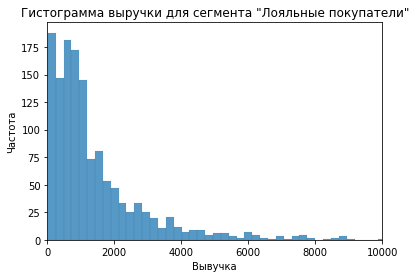

In [127]:
# посмотрим как распределяется выручка в каждой категории с помощью гисторгаммы 
# выручка лояльных покупателей
sns.histplot(loyalt) 
plt.xlabel('Вывучка')
plt.ylabel('Частота')
plt.xlim(0,10000)
plt.title('Гистограмма выручки для сегмента "Лояльные покупатели"')
plt.show()

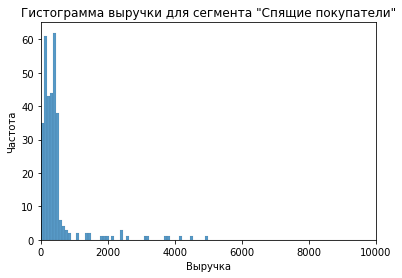

In [128]:
# выручка спящих покупателей
sns.histplot(sleep)
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.xlim(0, 10000)
plt.title('Гистограмма выручки для сегмента "Спящие покупатели"')
plt.show()

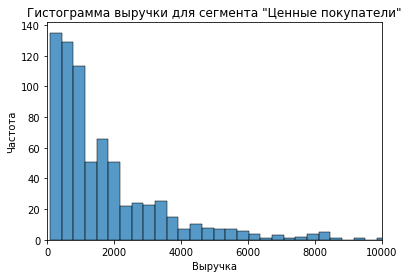

In [129]:
# выручка ценных покупателей
sns.histplot(valuab)
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.xlim(0, 10000)
plt.title('Гистограмма выручки для сегмента "Ценные покупатели"')
plt.show()

Гистограмма выручки для всех сегментов не имеют нормального распределения значений. Предположение о нормальности, необходимое для параметрических тестов (таких как t-тест), нарушается. Поэтому для проверки гипотезы о равенстве средних чеков двух сегментов с таким распределением данных требуется использовать непараметрический тест Манна-Уитни (U-тест). Однако тест Манн-Уитни сильно чаще обнаруживает неравенство в данных чем T-test, поэтому проверим гипотезу Т-тестом.

In [130]:
# сформируем листы для написания цикла 
seg = [loyalt, sleep, valuab]
seg_list = ['Лояльные покупатели', 'Спящие покупатели', 'Ценные покупатели']

In [131]:
# проверим гипотезу Т-тестом
# уровень статистической значимости примем равный среднему принимаемому значению
alpha = 0.05
for index_0 in range(len(seg)):
    for index_1 in range(index_0+1, len(seg)):
        result = stats.ttest_ind(seg[index_0], seg[index_1], equal_var=False)
        print()
        print('Сравниваем сегмент:', seg_list[index_0], seg_list[index_1])
        print('р-значение:{:.4f}'.format(result.pvalue))
        print('Средняя выручка 1 сегмента: {:.0f}'.format(seg[index_0].mean()))
        print('Средняя выручка 2 сегмента: {:.0f}'.format(seg[index_1].mean()))
        if result.pvalue < alpha:
            print('Отвергаем H0, средняя выручка в сегментах различается')
        else:
            print('Не отвергаем нулевую гипотезу, нет оснований считать, что средняя выручка в сегментах различается')


Сравниваем сегмент: Лояльные покупатели Спящие покупатели
р-значение:0.0000
Средняя выручка 1 сегмента: 1784
Средняя выручка 2 сегмента: 674
Отвергаем H0, средняя выручка в сегментах различается

Сравниваем сегмент: Лояльные покупатели Ценные покупатели
р-значение:0.8742
Средняя выручка 1 сегмента: 1784
Средняя выручка 2 сегмента: 1758
Не отвергаем нулевую гипотезу, нет оснований считать, что средняя выручка в сегментах различается

Сравниваем сегмент: Спящие покупатели Ценные покупатели
р-значение:0.0000
Средняя выручка 1 сегмента: 674
Средняя выручка 2 сегмента: 1758
Отвергаем H0, средняя выручка в сегментах различается


***Вывод***

При сравнении средней выручки между сегментами отвергли нулевую гипотезу о равенстве средней выручки между сегментами Лояльные - Спящие и Спящие - Ценные, считаем что средняя выручка различна. Между сегментами Лояльные - Ценные нет оснований считать что средняя выручка различается.

## Общий вывод ##

1. В данных были удалены дубликаты 1932 строк, данные были сокращены на 13,4%, тип данных в столбце date был изменён.
2. Покупателя с заказом на сумму 675 тысяч рублей удалили, так как эта сумма может исказить размер среднего чека и среднюю выручку интернет-магазина, а также повлиять на динамику этих показателей.
3. График общей выручки в течение всего периода находится в диапазоне от 3000 до 7000 рублей. Выручка в октябре, ноябре, декабре 18г, январе и июне 19г от 25000 до 50000р
4. График среднего чека показывает его нахождение в диапазоне до 2000р по всему периоду исследования. Есть средние чеки от 3000  до  6000 р в ноябре, декабре,январе, апреле, июне, июле, сентябре, октябре месяце.
5. График динамики средней выручки с покупателя показывает падение средней выручки в периоде с октября 2018г по апрель 2019г с 1700 до 1100р, подъем до 1300р в мае, затем снижение до 650р к концу периода.
6. С помощью RFM-анализа 2412 покупателей были разделены на 3 сегмента по покупательскому профилю.
   - группа Ценных покупателей 725 человек (1 с высокой оценкой 333):
   - группа Спящих покупателей - 322
   - группа Лояльные покупатели - 1365
7. Средний дневной чек Спящих покупателей 480р, Ценных покупателей 935р, Лояльных покупателей 1421р.
8. Анализ сегментов покупателей по категориям товаров показал в топ 5 продуктов входит:
   - Лояльные покупатели:цветы пеларгония (ее виды), сумка тележка
   - Спящие покупатели: сушилка для белья, виды цветов пеларгония
   - Ценные покупатели: цветы пеларгонии, сумка_тележка, сушилка для белья.
   
   Топ категорий для сегментов покупателей:
   - Лояльные покупатели:растения, хозтовары, декор,кухонная посуда, быт.химия, быт.приборы, общая
   - Спящие покупатели: растения, хозтовары, декор, кухонная посуда, бытовая химия, бытовые приборы, общая
   - Ценные покупатели: хозтовары, растения, кухонная посуда, декор, быт. приборы, быт. химия, общая
9. Анализ категорий товаров (выручки) и их сезонности по сегментам покупателей показал:
   - сегменте Лояльные покупатели наибольшую выручку показала категория хозтовары, вторая категория по выручке - растения с пиком выручки в мае. Остальные категории имеют низку выручку в течении всего периода в районе до 25000р без роста.
   - лидером по выручке в сегменте Ценные покупатели является категория хозтовары с пиком в декабре 18г, марте и декабре 19г. Остальные категории движутся группой и имеют выручку до 10000р в месяц на протяжении всего периода анализа, лишь категория растения увеличивае выручку свыше 10000р с ноября 19г и до конца периода анализа.
   - сегмент Спящие покупатели в начале периода имел лидером по выручке категории хозтовары и растения с пиком выручки в январе (свыше 60000р) и марте (15000р) соответственно для категорий. С апреля 19г данных о покупках в интернет-магазиине сегментом нет.
10. Проверка гипотез:
    - Сравнение средних чеков сегментов Лояльные - Спящие, Лояльные - Ценные и Ценные - Спящие показало различие в средних чеках между этими сегментами.
    - При сравнении средней выручки между сегментами отвергли нулевую гипотезу о равенстве средней выручки между сегментами Лояльные - Спящие и Спящие - Ценные, считаем что средняя выручка различна. Между сегментами Лояльные - Ценные нет оснований считать что средняя выручка различается.

## Рекомендации ##

 Анализ категорий товаров и их сезонности по сегментам покупателей показал необходимость предлагать покупателям товары в следующие месяца:
   - сегмент Лояльные покупатели: 
      - январь - хозтовары, декор, кухонная посуда
      - февраль - хозтовары, кухонная посуда, декор
      - март -хозтовары, растения, кухонная посуда 
      - апрель - хозтовары, растения, кухонная посуда
      - май - растения, хозтовары, кухонная посуда
      - июнь - хозтовары, растения, общая
      - июль - хозтовары, растения, общая
      - август - хозтовары, растения
      - сентябрь - хозтовары, растения, кухонная посуда
      - октябрь - хозтовары, растения, декор
      - ноябрь - хозтовары, кухонная посуда, растения
      - декабрь - хозтовары, растения
    - сегмент Ценные покупатели: 
      - январь - хозтовары, кухонная посуда, бытовые приборы
      - февраль - хозтовары, кухонная посуда, бытовые приборы
      - март -хозтовары, растения, бытовые приборы
      - апрель - хозтовары
      - май - хозтовары
      - июнь - хозтовары
      - июль - хозтовары, кухонная посуда
      - август - хозтовары
      - сентябрь - хозтовары
      - октябрь - хозтовары,растения, кухонная посуда
      - ноябрь - хозтовары, растения, кухонная посуда
      - декабрь - хозтовары, растения, кухонная посуда
    - сегмент Спящие покупатели: 
      - январь - хозтовары, растения,декор
      - февраль - хозтовары,растения, кухонная посуда
      - март - хозтовары, растения 
      - апрель - хозтовары
      - октябрь - хозтовары, растения, декор
      - ноябрь - хозтовары, кухонная посуда, растения
      - декабрь - хозтовары, растения, кухонная посуда